In [48]:
!pip install opendatasets
!pip install pandas
!pip install numpy
!pip install tensorflow
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install category_encoders
!pip install scikit-learn==1.2.2
!pip install imblearn
!pip install autoviz
!pip install scipy

# Importing Necessary Libraries

In [49]:
import numpy as np
import pandas as pd
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import scipy.stats as stats
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.combine import SMOTEENN
import pickle
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [50]:
od.download("https://www.kaggle.com/datasets/muhammadshahidazeem/panic-disorder-detection-dataset")

Skipping, found downloaded files in "./panic-disorder-detection-dataset" (use force=True to force download)


# Loading the Datasets

In [51]:
input_test = ('./panic-disorder-detection-dataset/panic_disorder_dataset_testing.csv')
input_train = ('./panic-disorder-detection-dataset/panic_disorder_dataset_training.csv')
test = pd.read_csv(input_test)
train = pd.read_csv(input_train)

In [52]:
train.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0


In [53]:
test.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,41,Male,Yes,No,High,Shortness of breath,Mild,Mild,Urban,Diabetes,Bipolar disorder,Alcohol,Seeking therapy,Low,Exercise,0
1,2,20,Female,Yes,No,Low,Shortness of breath,Mild,Significant,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Diet,0
2,3,32,Male,Yes,Yes,High,Panic attacks,Severe,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Meditation,Moderate,Exercise,0
3,4,41,Female,Yes,Yes,Moderate,Shortness of breath,Moderate,Significant,Urban,Heart disease,Anxiety disorder,NaN,Exercise,High,Sleep quality,0
4,5,36,Female,Yes,No,High,Chest pain,Severe,Significant,Rural,Asthma,Depressive disorder,NaN,Seeking therapy,Low,Exercise,0


In [54]:
print("Training set", train.shape)
print("Testing set", test.shape)

Training set (100000, 17)
Testing set (20000, 17)


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            100000 non-null  int64 
 1   Age                       100000 non-null  int64 
 2   Gender                    100000 non-null  object
 3   Family History            100000 non-null  object
 4   Personal History          100000 non-null  object
 5   Current Stressors         100000 non-null  object
 6   Symptoms                  100000 non-null  object
 7   Severity                  100000 non-null  object
 8   Impact on Life            100000 non-null  object
 9   Demographics              100000 non-null  object
 10  Medical History           74827 non-null   object
 11  Psychiatric History       75079 non-null   object
 12  Substance Use             66626 non-null   object
 13  Coping Mechanisms         100000 non-null  object
 14  Socia

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Participant ID            20000 non-null  int64 
 1   Age                       20000 non-null  int64 
 2   Gender                    20000 non-null  object
 3   Family History            20000 non-null  object
 4   Personal History          20000 non-null  object
 5   Current Stressors         20000 non-null  object
 6   Symptoms                  20000 non-null  object
 7   Severity                  20000 non-null  object
 8   Impact on Life            20000 non-null  object
 9   Demographics              20000 non-null  object
 10  Medical History           14999 non-null  object
 11  Psychiatric History       15011 non-null  object
 12  Substance Use             13383 non-null  object
 13  Coping Mechanisms         20000 non-null  object
 14  Social Support        

In [57]:
train.columns

Index(['Participant ID', 'Age', 'Gender', 'Family History', 'Personal History',
       'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life',
       'Demographics', 'Medical History', 'Psychiatric History',
       'Substance Use', 'Coping Mechanisms', 'Social Support',
       'Lifestyle Factors', 'Panic Disorder Diagnosis'],
      dtype='object')

# Data features description (17 features)


1.  Participant ID: An exclusive identifier assigned to each participant
2.  Age: The participant's age at the time
3. Gender: The participant's gender
4. Family History: About the presence of Panic Disorder or other mental health conditions in the participant's family
5. Personal History: Information of the participant's past experiences relevant to mental health.

6. Current Stressors: Present stressors in the participant's life that may impact mental health
7. Symptoms: Reported symptoms by the participant
8. Severity: The extent of severity regarding the reported symptoms
9. Impact on Life: Evaluation of how the symptoms affect the participant's daily functioning, encompassing work, relationships, and other domains
10. Demographics: Participant's demographic characteristics
11. Medical History: Participant's general medical background
12. Psychiatric History: Participant's history of psychiatric conditions
13. Substance Use: Participant's usage of substances
14. Coping Mechanisms: Strategies employed by the participant to manage stress or Panic Disorder symptoms
15. Social Support: Quantity and quality of available social support including friends, family, or other support groups

16. Lifestyle Factors: Factors associated with the participant's lifestyle that may influence mental health such as sleep habits, dietary patterns, and physical activity
17. Panic Disorder Diagnosis: The diagnosis of panic disorder which indicates whether the participant has panic disorder or not





In [58]:
print(train.isnull().values.sum())
train[train.isnull().any(axis=1)]

83468


,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0
5,6,38,Male,Yes,Yes,Moderate,Dizziness,Moderate,Significant,Urban,NaN,Bipolar disorder,Alcohol,Seeking therapy,Moderate,Exercise,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,99995,24,Male,Yes,No,High,Dizziness,Moderate,Moderate,Rural,NaN,Bipolar disorder,Drugs,Seeking therapy,Low,Exercise,0
99995,99996,22,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,Heart disease,NaN,NaN,Socializing,Low,Diet,0
99996,99997,57,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,NaN,Meditation,High,Diet,0
99997,99998,20,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Seeking therapy,Low,Exercise,0


In [59]:
print(test.isnull().values.sum())
test[test.isnull().any(axis=1)]

16607


,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
3,4,41,Female,Yes,Yes,Moderate,Shortness of breath,Moderate,Significant,Urban,Heart disease,Anxiety disorder,NaN,Exercise,High,Sleep quality,0
4,5,36,Female,Yes,No,High,Chest pain,Severe,Significant,Rural,Asthma,Depressive disorder,NaN,Seeking therapy,Low,Exercise,0
5,6,23,Female,Yes,Yes,Moderate,Panic attacks,Moderate,Moderate,Rural,NaN,Anxiety disorder,NaN,Seeking therapy,Low,Exercise,0
7,8,64,Male,No,No,High,Shortness of breath,Mild,Mild,Rural,Heart disease,NaN,NaN,Socializing,High,Exercise,0
8,9,49,Male,No,No,Low,Dizziness,Severe,Moderate,Urban,NaN,NaN,Alcohol,Exercise,High,Diet,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,19993,38,Female,Yes,No,Moderate,Dizziness,Moderate,Significant,Rural,Heart disease,NaN,Drugs,Socializing,High,Diet,0
19993,19994,62,Male,Yes,No,Low,Fear of losing control,Mild,Significant,Urban,NaN,NaN,Drugs,Seeking therapy,Low,Sleep quality,0
19994,19995,27,Male,Yes,Yes,Moderate,Dizziness,Mild,Moderate,Urban,NaN,Anxiety disorder,Drugs,Seeking therapy,High,Diet,0
19995,19996,31,Female,Yes,Yes,High,Chest pain,Moderate,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Exercise,Moderate,Sleep quality,0


In [60]:
print(train.drop(labels = ['Medical History','Psychiatric History','Substance Use'],axis = 1).isnull().values.sum())
train[train.drop(labels = ['Medical History','Psychiatric History','Substance Use'],axis = 1).isnull().any(axis=1)]

0


,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis


In [61]:
print(test.drop(labels = ['Medical History','Psychiatric History','Substance Use'],axis = 1).isnull().values.sum())
test[test.drop(labels = ['Medical History','Psychiatric History','Substance Use'],axis = 1).isnull().any(axis=1)]

0


,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis


***There are Null values present in both training data and testing data***

These null values specifically availabe in
1. Medical History
2. Psychiatric History
3. Substance Use


We have null values. Now we have probably few ways to deal with these null values. There could be many ways but can be broadly classified into two major types:

1. Deleting the Missing Values
2. Imputing the Missing Values
  1. Mean/medain/Mode Imputation
 2. Arbritrary Value Imputation
 3. Deductive Imputation
 4. hot-deck imputation
 5. Model-Based Imputation
 6. Regression Imputation
 7. Pattern Submodel Approach

 Here we will not be deleting any missing value because Imputation of data is better than actually reducing the data.


# ***Re-formatting of data-types***
The following columns are not in int64 datatype, hence to use their data, we need to convert by reformatting them using Categorical Data Encoding Methods

 1. Lifestyle Factors ---------------- *Multivariate*
 2.   Gender     ------------------------------- *Bivariate*                
 3.   Family History  ------------------- *Bivariate*          
 4.   Personal History  --------------- *Bivariate*        
 5.   Current Stressors  ------------- *Multivariate*       
 6.   Symptoms ----------------------- *Multivariate*                  
 7.   Severity ---------------------------- *Multivariate*                 
 8.   Impact on Life ----------------- *Multivariate*           
 9.   Demographics ----------------- *Bivariate*             
 10.  Medical History --------------- *Multivariate*           
 11.  Psychiatric History  ---------- *Multivariate*     
 12.  Substance Use  ---------------- *Multivariate*           
 13. Coping Mechanisms   ------- *Multivariate*      
 14.  Social Support   ---------------- *Multivariate*         


In [62]:
for col in train.drop(labels = ['Participant ID','Age','Panic Disorder Diagnosis'],axis = 1):
    print(col,":",train[col].unique())


Gender : ['Male' 'Female']
Family History : ['No' 'Yes']
Personal History : ['Yes' 'No']
Current Stressors : ['Moderate' 'High' 'Low']
Symptoms : ['Shortness of breath' 'Panic attacks' 'Chest pain' 'Dizziness'
 'Fear of losing control']
Severity : ['Mild' 'Moderate' 'Severe']
Impact on Life : ['Mild' 'Significant' 'Moderate']
Demographics : ['Rural' 'Urban']
Medical History : ['Diabetes' 'Asthma' nan 'Heart disease']
Psychiatric History : ['Bipolar disorder' 'Anxiety disorder' 'Depressive disorder' nan]
Substance Use : [nan 'Drugs' 'Alcohol']
Coping Mechanisms : ['Socializing' 'Exercise' 'Seeking therapy' 'Meditation']
Social Support : ['High' 'Moderate' 'Low']
Lifestyle Factors : ['Sleep quality' 'Exercise' 'Diet']


In [63]:
print(train.drop(labels = ['Participant ID','Age','Panic Disorder Diagnosis'],axis = 1).apply(lambda col: col.unique()))


Gender                                                    [Male, Female]
Family History                                                 [No, Yes]
Personal History                                               [Yes, No]
Current Stressors                                  [Moderate, High, Low]
Symptoms               [Shortness of breath, Panic attacks, Chest pai...
Severity                                        [Mild, Moderate, Severe]
Impact on Life                             [Mild, Significant, Moderate]
Demographics                                              [Rural, Urban]
Medical History                   [Diabetes, Asthma, nan, Heart disease]
Psychiatric History    [Bipolar disorder, Anxiety disorder, Depressiv...
Substance Use                                      [nan, Drugs, Alcohol]
Coping Mechanisms      [Socializing, Exercise, Seeking therapy, Medit...
Social Support                                     [High, Moderate, Low]
Lifestyle Factors                        [Sleep qua

In [64]:
train =  train.drop(labels = "Participant ID",axis = 1)

In [65]:
test =  test.drop(labels = "Participant ID",axis = 1)

In [66]:

# Dealing with Multivariate Ordinal(with missing valus)
## Note: There are two paths. Coding mising value as another vairables, thus removing the missing value(no need of imputation methods). OR we could not mark the
## mising value and deal with remaining with imputation methods

## Rationally we should go by first and mark missing value, because missing values in these three columns have logical reason. There was no option to leave as blank or
## possibly no option to mark as "other" or "none". Hence assuming it as other is most rational decision.
## Thus this will also solve the issue of missing value


train.fillna("Others",inplace=True,axis = 1)
test.fillna("Others",inplace=True,axis = 1)
train["Medical History"] = train["Medical History"].replace({'Diabetes':0,'Asthma':1,'Heart disease':2,'Others':3}).astype('int64')
train["Psychiatric History"] = train["Psychiatric History"].replace({'Bipolar disorder':0,'Anxiety disorder':1,'Depressive disorder':2,'Others':3}).astype('int64')
train["Substance Use"] = train["Substance Use"].replace({'Drugs':0,'Alcohol':1,'Others':2}).astype('int64')

test["Medical History"] = test["Medical History"].replace({'Diabetes':0,'Asthma':1,'Heart disease':2,'Others':3}).astype('int64')
test["Psychiatric History"] = test["Psychiatric History"].replace({'Bipolar disorder':0,'Anxiety disorder':1,'Depressive disorder':2,'Others':3}).astype('int64')
test["Substance Use"] = test["Substance Use"].replace({'Drugs':0,'Alcohol':1,'Others':2}).astype('int64')

label_encoder = LabelEncoder()
# Iterate over each column in the dataset
for column in train.drop(labels = ["Medical History","Psychiatric History","Substance Use","Panic Disorder Diagnosis"],axis=1).columns:
    # Check if the column contains string values
    if train[column].dtype == "object":
        # Fit label encoder on the column
        label_encoder.fit(train[column])
        # Transform the string values to integers
        train[column] = label_encoder.transform(train[column])
for column in test.drop(labels = ["Medical History","Psychiatric History","Substance Use","Panic Disorder Diagnosis"],axis=1).columns:
    # Check if the column contains string values
    if test[column].dtype == "object":
        # Fit label encoder on the column
        label_encoder.fit(test[column])
        # Transform the string values to integers
        test[column] = label_encoder.transform(test[column])

train['Panic Disorder Diagnosis'] = train['Panic Disorder Diagnosis'].astype('int64')
test['Panic Disorder Diagnosis'] = test['Panic Disorder Diagnosis'].astype('int64')


# scaler = StandardScaler()
# #scaling of training dataset
# train= scaler.fit_transform(train)
# test = scaler.fit_transform(test)

# Small function to do the same thing as we have implemented as above
# def transform(df):
#   columns = ['Gender','Family History','Personal History','Current Stressors','Symptoms','Severity','Impact on Life','Demographics','Medical History','Psychiatric History','Substance Use','Coping Mechanisms','Social Support','Lifestyle Factors']
#   # Create a dictionary that maps each categorical value to a unique integer
#   mapping = {}
#   category = ''
#   encoding = 0
#   for column in columns:
#     unique_values = df[column].unique()
#     print('---------------------------------------------------------------------')
#     print('column = ',column)
#     for i, value in enumerate(unique_values):
#         mapping[value] = i
#         category = value
#         encoding = i
#         print('category = ',category, '(',encoding,')')
#   df_No = df_No.replace(mapping)


In [67]:
for col in train.drop(labels = ['Age','Panic Disorder Diagnosis'],axis = 1):
    print(col,":",train[col].unique())

Gender : [1 0]
Family History : [0 1]
Personal History : [1 0]
Current Stressors : [2 0 1]
Symptoms : [4 3 0 1 2]
Severity : [0 1 2]
Impact on Life : [0 2 1]
Demographics : [0 1]
Medical History : [0 1 3 2]
Psychiatric History : [0 1 2 3]
Substance Use : [2 0 1]
Coping Mechanisms : [3 0 2 1]
Social Support : [0 2 1]
Lifestyle Factors : [2 1 0]


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Age                       100000 non-null  int64
 1   Gender                    100000 non-null  int64
 2   Family History            100000 non-null  int64
 3   Personal History          100000 non-null  int64
 4   Current Stressors         100000 non-null  int64
 5   Symptoms                  100000 non-null  int64
 6   Severity                  100000 non-null  int64
 7   Impact on Life            100000 non-null  int64
 8   Demographics              100000 non-null  int64
 9   Medical History           100000 non-null  int64
 10  Psychiatric History       100000 non-null  int64
 11  Substance Use             100000 non-null  int64
 12  Coping Mechanisms         100000 non-null  int64
 13  Social Support            100000 non-null  int64
 14  Lifestyle Factors    

In [69]:
train

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,20,1,0,1,2,4,0,0,0,0,0,2,3,0,2,0
1,33,1,0,0,0,3,0,0,1,1,1,0,0,0,2,0
2,14,0,1,0,0,3,0,2,1,0,2,2,2,2,1,0
3,46,0,0,0,2,0,1,1,0,0,3,2,1,0,1,0
4,13,1,1,0,2,3,0,1,0,1,3,0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,1,1,0,0,0,0,0,0,2,3,2,3,1,0,0
99996,39,0,0,1,1,3,2,0,0,2,2,2,1,0,0,0
99997,2,1,1,0,2,3,2,1,0,2,0,2,2,1,1,0
99998,38,0,1,1,0,0,2,0,0,0,1,0,3,0,2,1


In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       20000 non-null  int64
 1   Gender                    20000 non-null  int64
 2   Family History            20000 non-null  int64
 3   Personal History          20000 non-null  int64
 4   Current Stressors         20000 non-null  int64
 5   Symptoms                  20000 non-null  int64
 6   Severity                  20000 non-null  int64
 7   Impact on Life            20000 non-null  int64
 8   Demographics              20000 non-null  int64
 9   Medical History           20000 non-null  int64
 10  Psychiatric History       20000 non-null  int64
 11  Substance Use             20000 non-null  int64
 12  Coping Mechanisms         20000 non-null  int64
 13  Social Support            20000 non-null  int64
 14  Lifestyle Factors         20000 non-nu

In [71]:
test

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,23,1,1,0,0,4,0,0,1,0,0,1,2,1,1,0
1,2,0,1,0,1,4,0,2,1,1,1,0,0,0,0,0
2,14,1,1,1,0,3,2,0,0,2,0,0,1,2,1,0
3,23,0,1,1,2,4,1,2,1,2,1,2,0,0,2,0
4,18,0,1,0,0,0,2,2,0,1,2,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,13,0,1,1,0,0,1,1,0,2,0,2,0,2,2,0
19996,9,1,0,1,0,3,0,1,0,1,0,1,0,0,0,0
19997,3,0,0,0,1,1,1,2,1,1,1,1,3,2,0,0
19998,10,1,0,1,2,1,0,2,0,2,1,2,1,2,2,0


Filtering out Outliers
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.

We can detect/handling outliers through 2 major detections:

1. IQR Method
2. Z-Score
We will be applying all three methods one by one effectively analyse our outlier data

In [72]:
skewvalue=train.skew(axis=0)
skewvalue

Age                         0.000628
Gender                     -0.002080
Family History             -0.001680
Personal History            0.008400
Current Stressors           0.002699
Symptoms                    0.005477
Severity                   -0.002668
Impact on Life              0.004354
Demographics                0.003480
Medical History            -0.004513
Psychiatric History         0.002568
Substance Use              -0.003543
Coping Mechanisms          -0.004333
Social Support              0.001839
Lifestyle Factors           0.004749
Panic Disorder Diagnosis    4.514710
dtype: float64

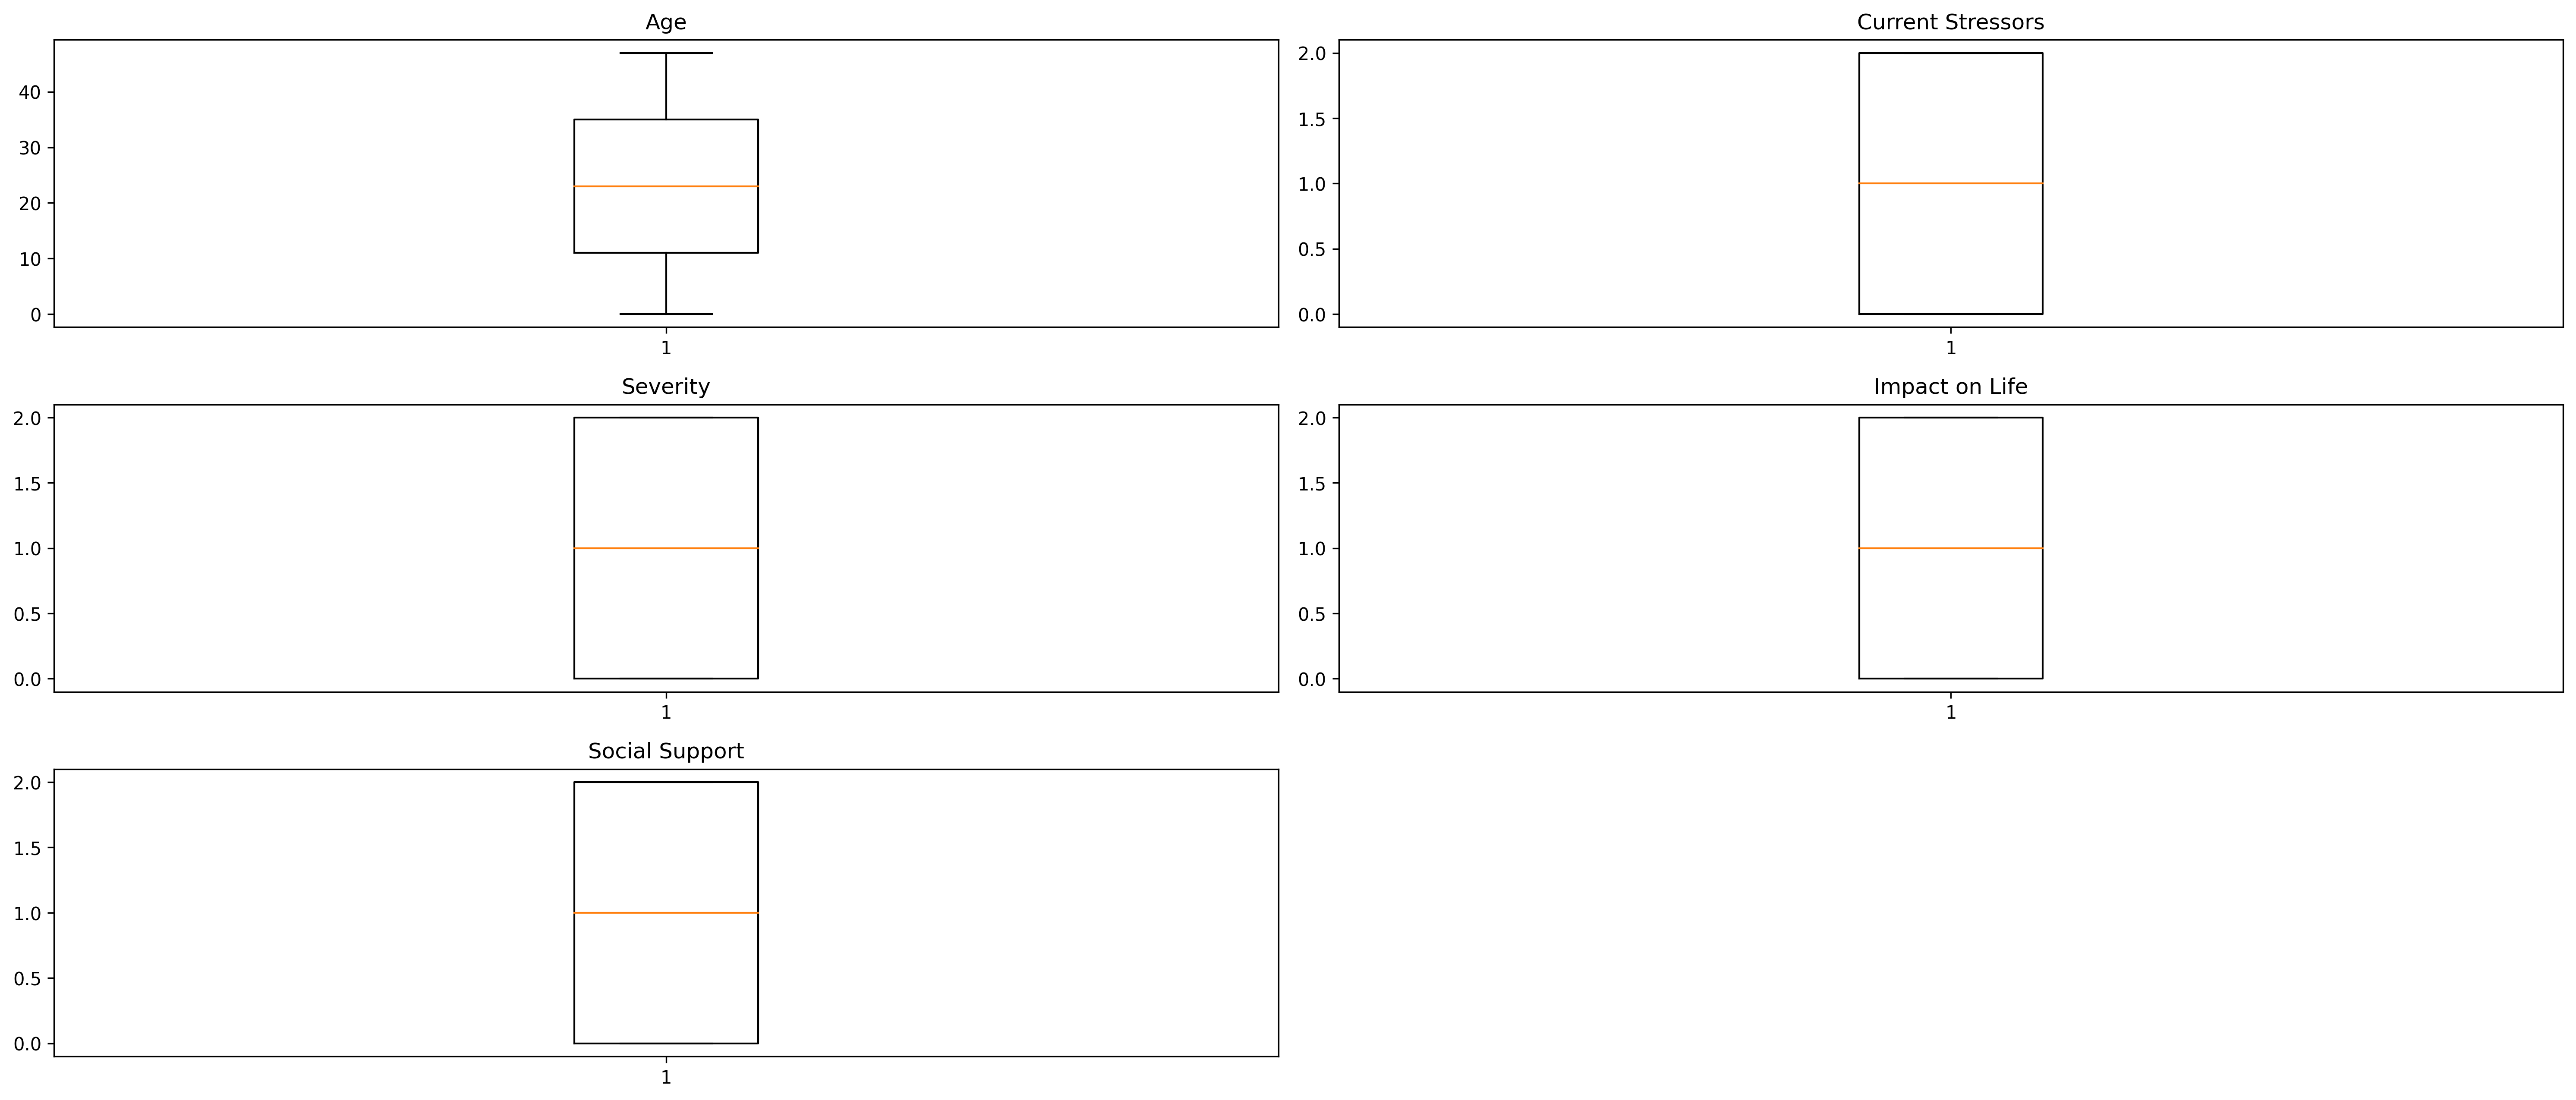

In [73]:
plt.figure(figsize=(20,14),dpi=300)
fill_list=['Age','Current Stressors','Severity','Impact on Life','Social Support']
for i,col in enumerate(fill_list):
    plt.subplot(5,2,i+1)
    plt.boxplot(col, data=train)
    plt.title(col)
plt.tight_layout()
plt.show()

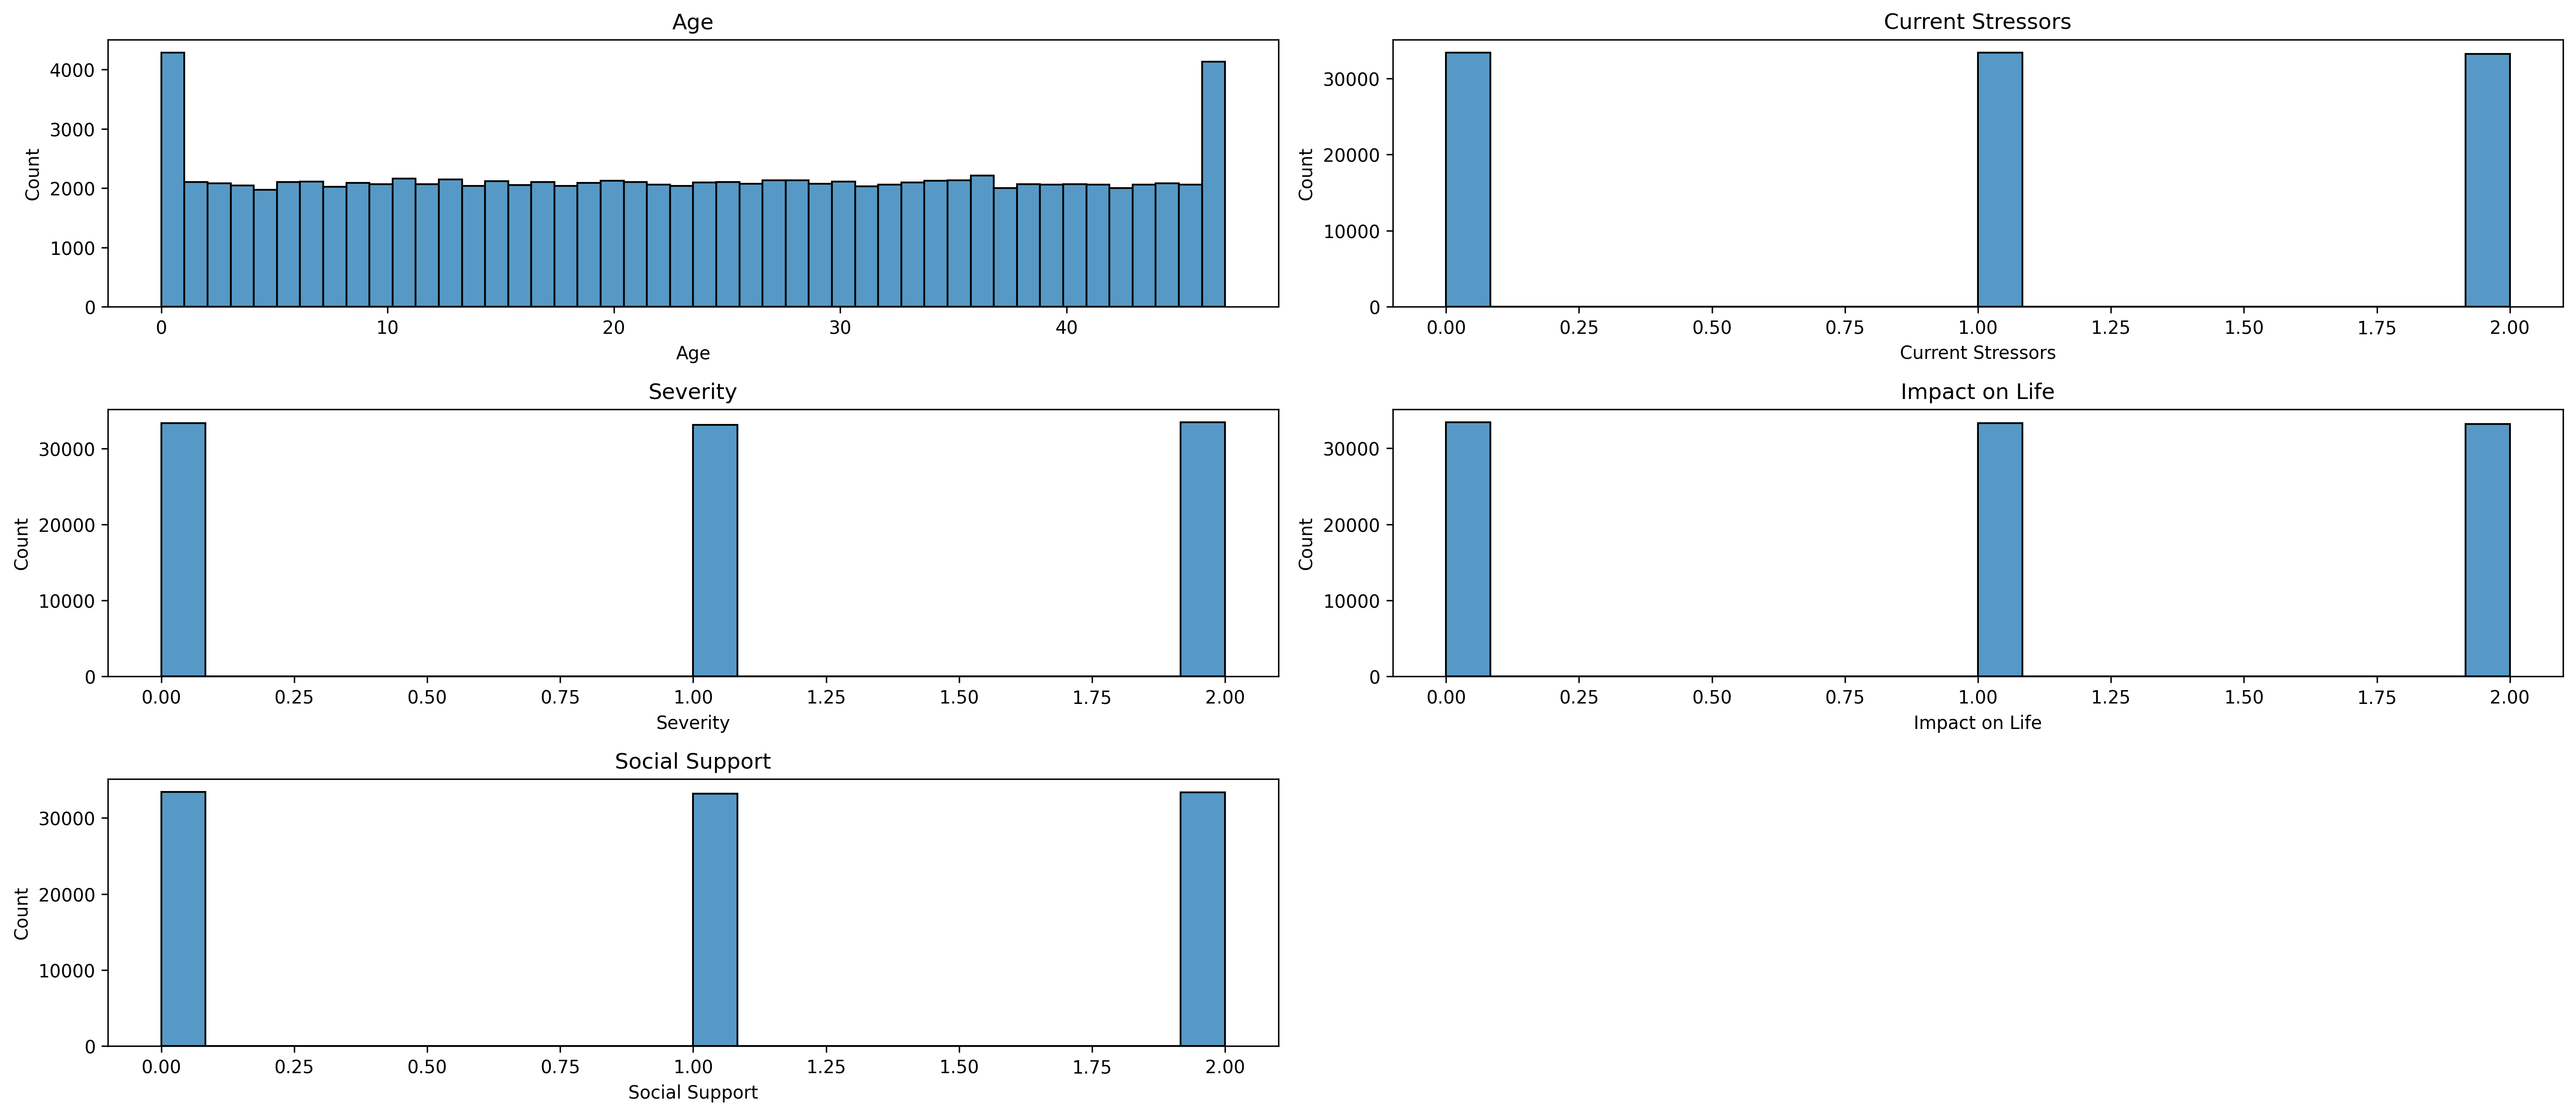

In [74]:
plt.figure(figsize=(20,14),dpi=300)
fill_list=['Age','Current Stressors','Severity','Impact on Life','Social Support']
for i,col in enumerate(fill_list):
    plt.subplot(5,2,i+1)
    sns.histplot(train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

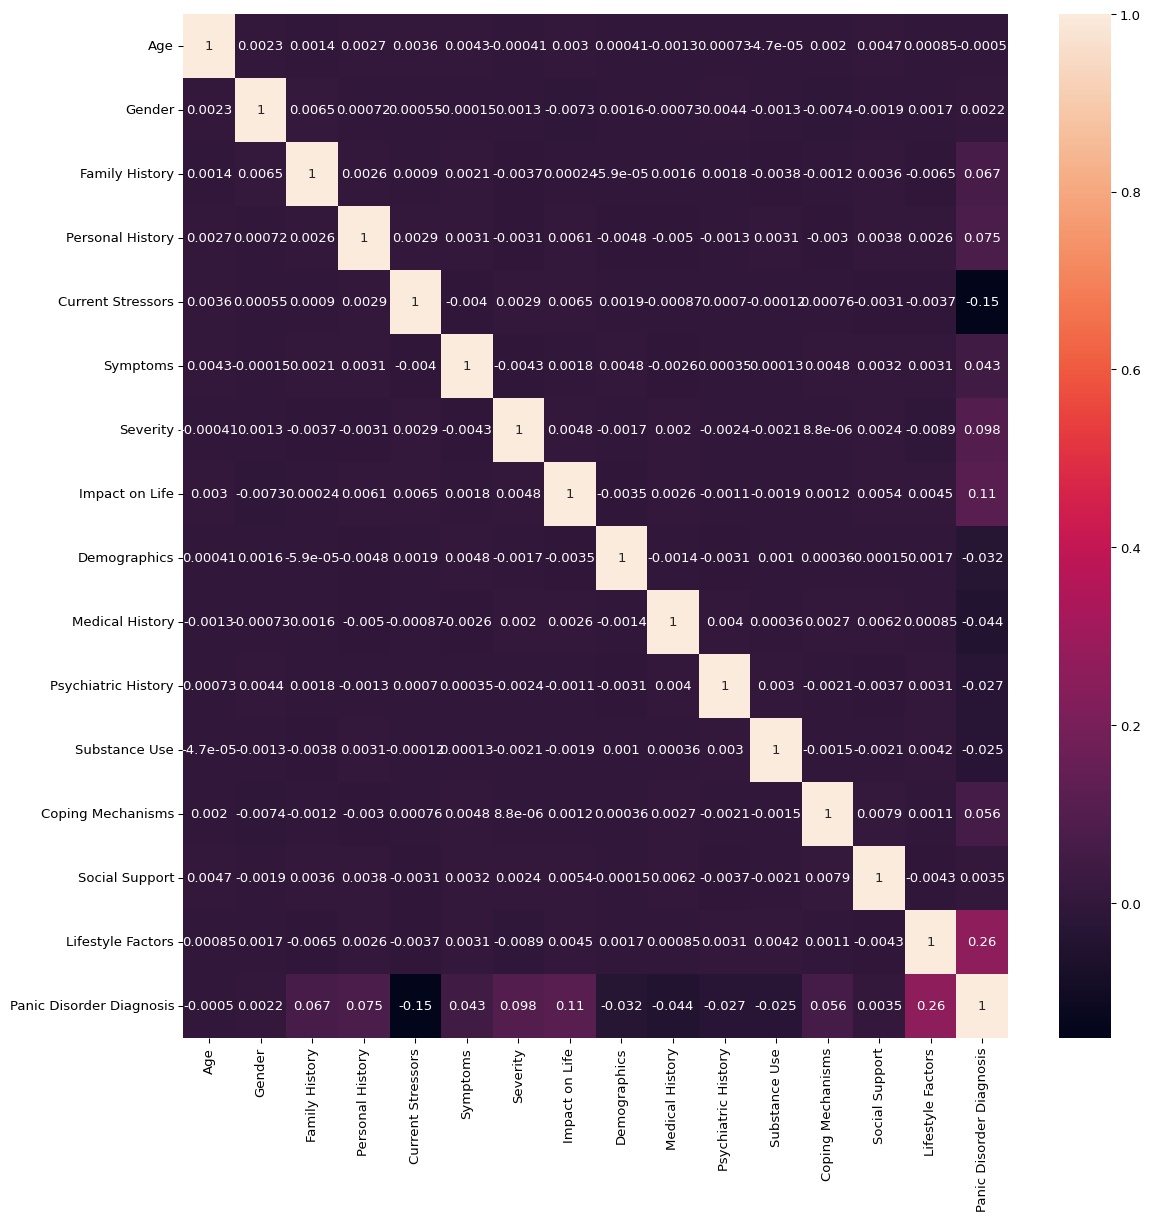

In [75]:
cor = train.corr()
plt.figure(figsize=(14,14),dpi=95)
sns.heatmap(cor,annot=True)
plt.show()

In [76]:
# estimator = ExtraTreesRegressor(random_state=42)

# rfecv = RFECV(estimator, min_features_to_select = 1)

# # Fit the data
# rfecv.fit(train.drop(labels = ['Panic Disorder Diagnosis'],axis =1),train["Panic Disorder Diagnosis"])

# # Get integer index of the features selected
# feature_index = rfecv.get_support(indices = True)

# # Get a mask of the features selected
# feature_mask = rfecv.support_

# # Get selected feature names
# feature_names = rfecv.get_feature_names_out()

# # Get the number of features retained
# feature_number = rfecv.n_features_

# # Get results
# results = pd.DataFrame(rfecv.cv_results_)

# # Get RFECV score
# rfecv_score = rfecv.score(train.drop(labels = ['Panic Disorder Diagnosis'],axis =1),train["Panic Disorder Diagnosis"])

# # Print feature number, names and score
# print('Original feature number:', len(train_resampled.columns))
# print('Optimal feature number:', feature_number)
# print('Selected features:', feature_names)
# print('Score:', rfecv_score)


# Original feature number: 16
# Optimal feature number: 13
# Selected features: ['Family History' 'Personal History' 'Current Stressors' 'Symptoms'
#  'Severity' 'Impact on Life' 'Demographics' 'Medical History'
#  'Psychiatric History' 'Substance Use' 'Coping Mechanisms'
#  'Social Support' 'Lifestyle Factors']
# Score: 1.0

# EDA

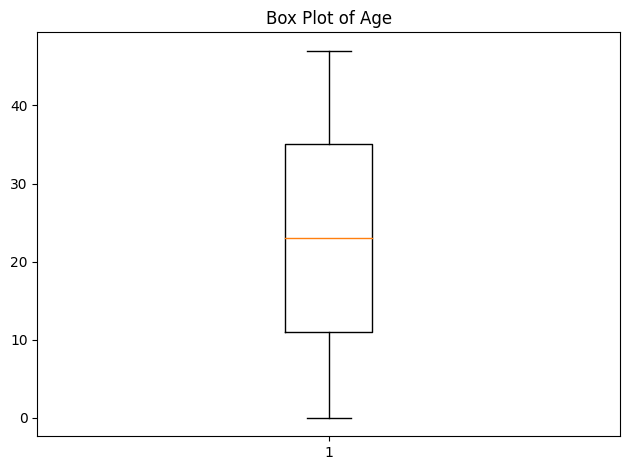

In [77]:
cols = ["Age"]
plt.boxplot(train["Age"])
plt.title("Box Plot of Age")
plt.tight_layout()
plt.show()

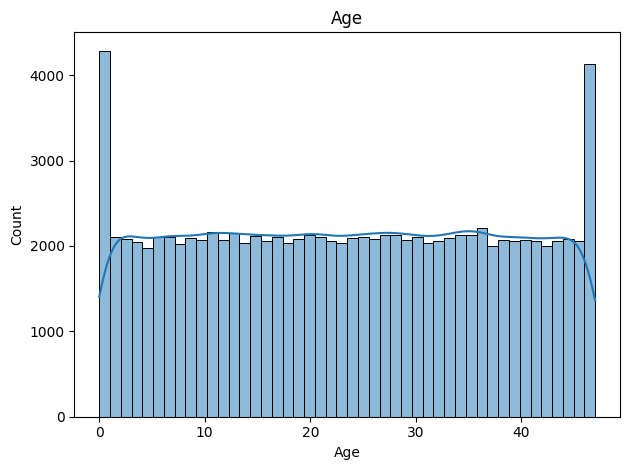

In [78]:
sns.histplot(train["Age"],kde=True)
plt.title("Age")
plt.tight_layout()
plt.show()

In [79]:
train["Age"].describe()

count    100000.000000
mean         23.454300
std          13.839204
min           0.000000
25%          11.000000
50%          23.000000
75%          35.000000
max          47.000000
Name: Age, dtype: float64

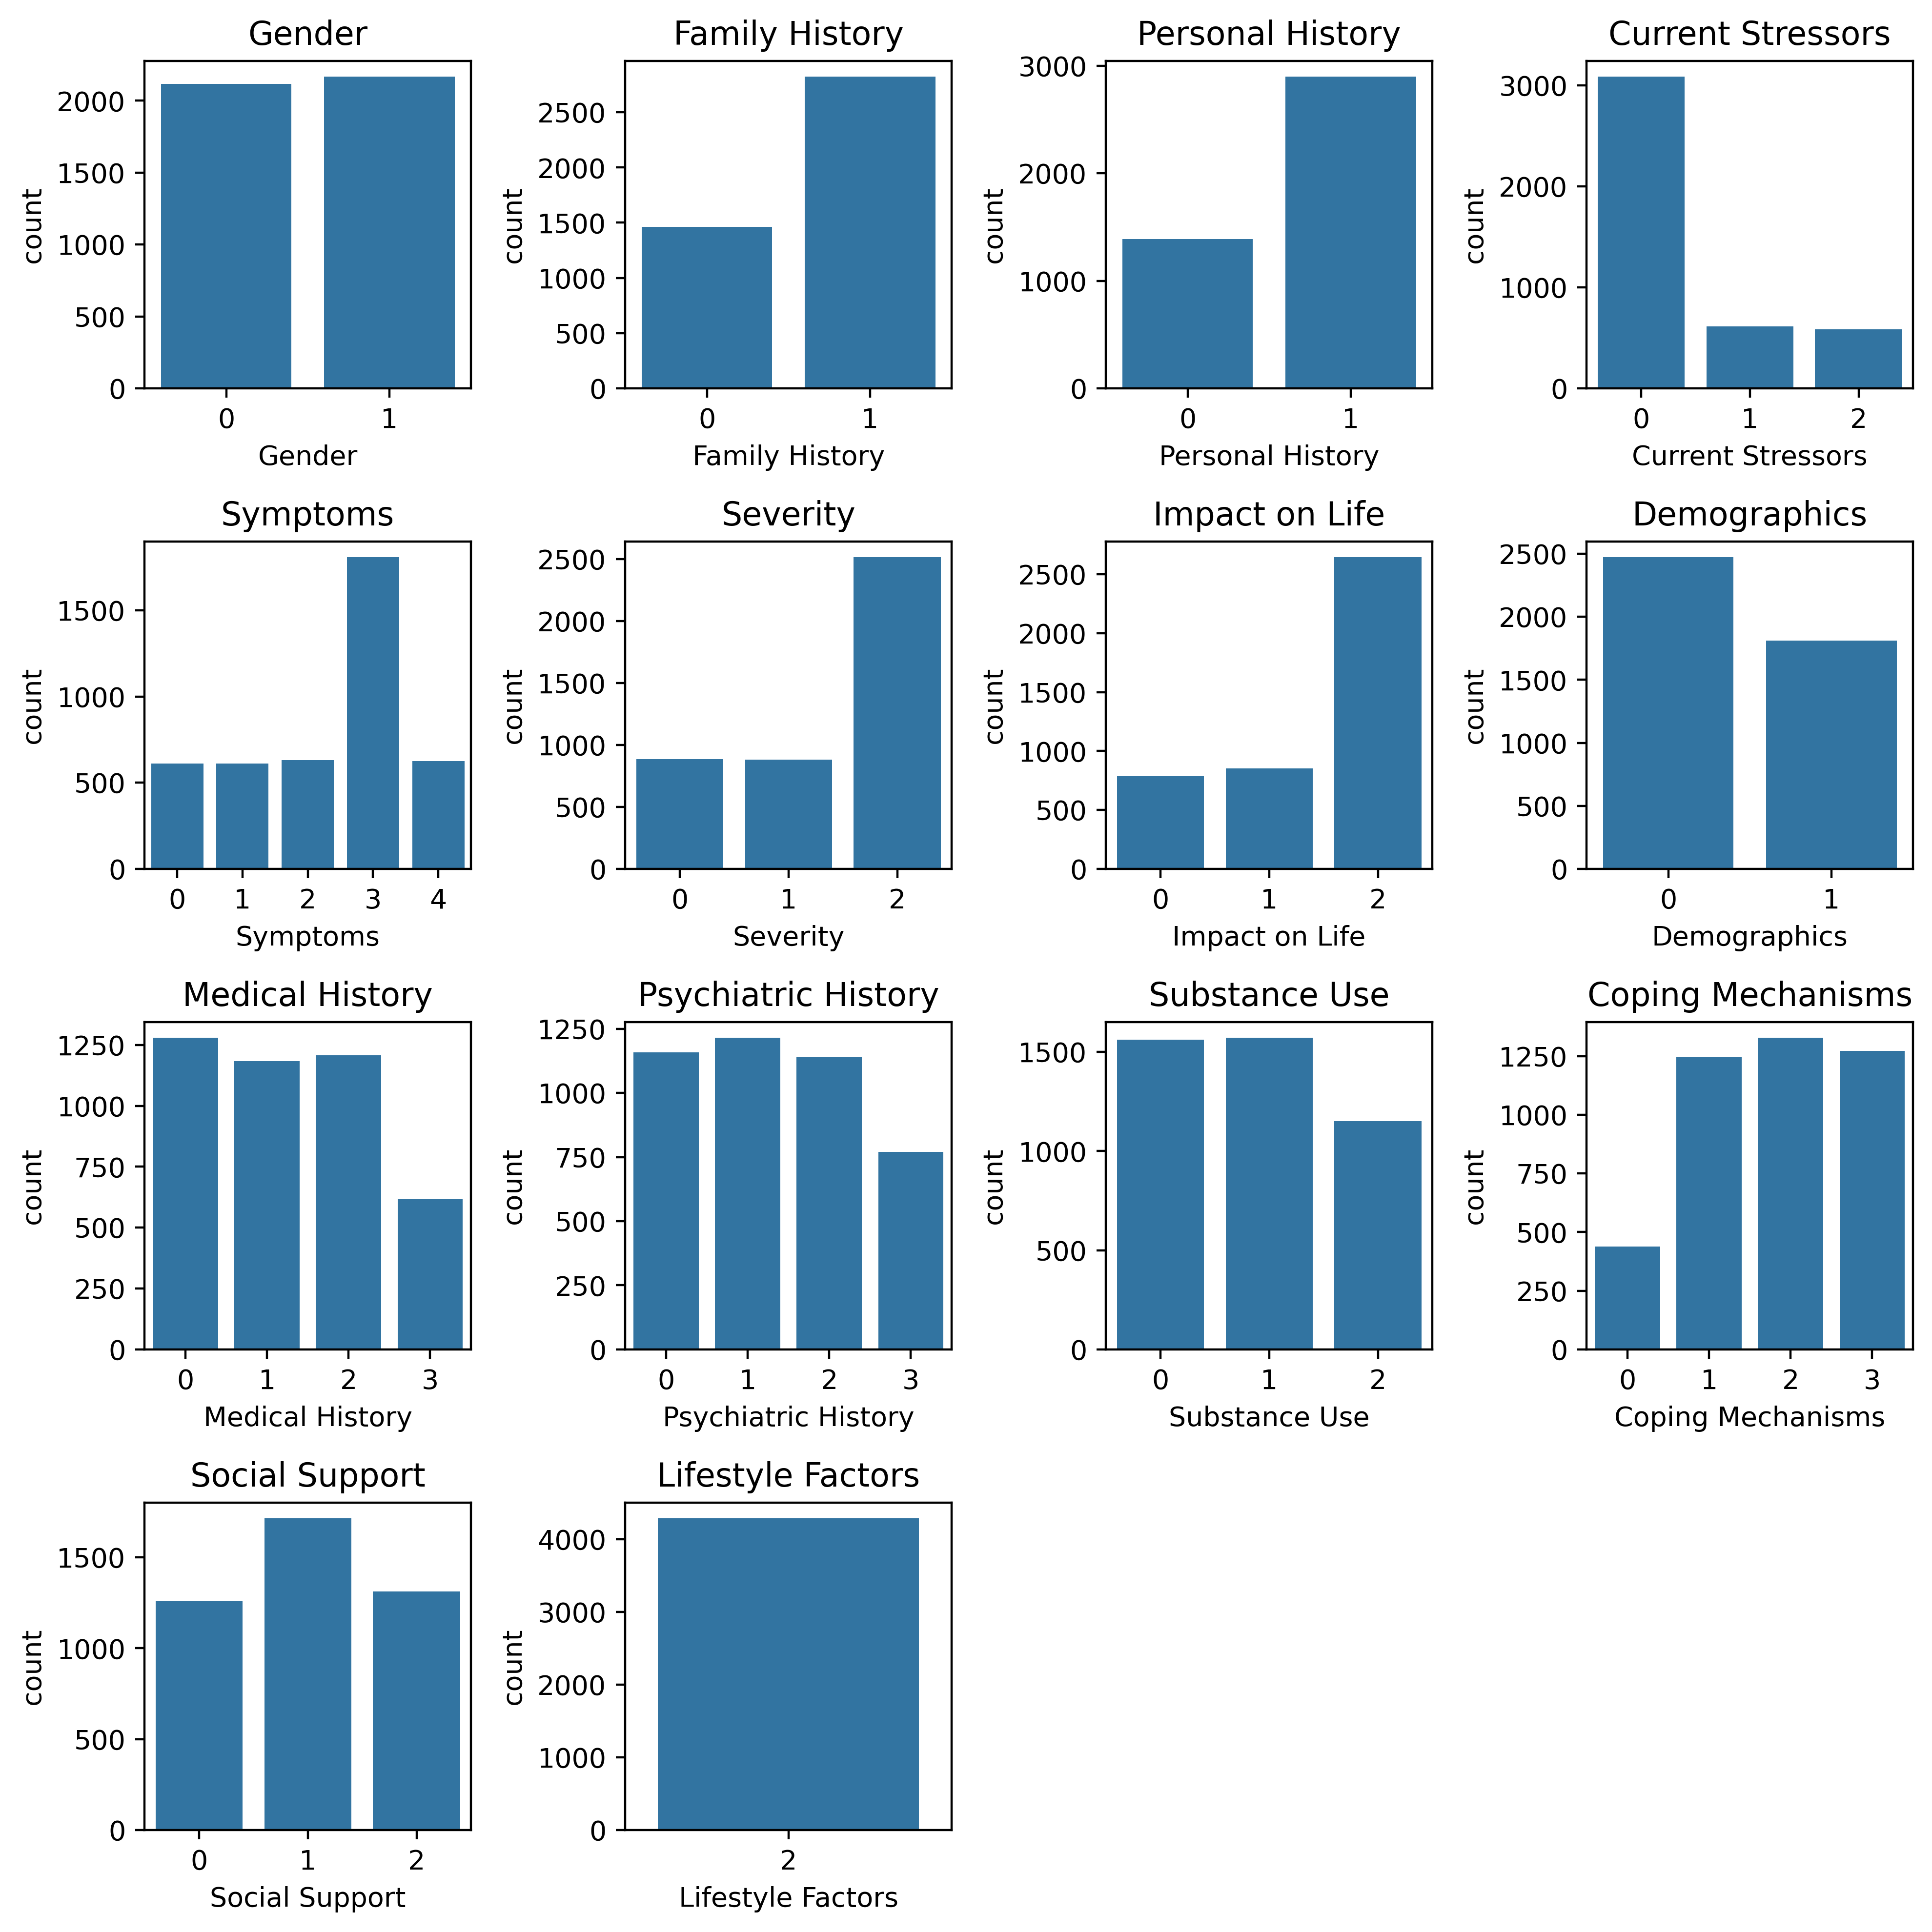

In [80]:
plt.figure(figsize=(10,10),dpi=400)
for i,col in enumerate(train.drop(labels = ['Age','Panic Disorder Diagnosis'],axis = 1).columns):
    plt.subplot(4,4,i+1)
    sns.countplot(train[train["Panic Disorder Diagnosis"]==1], x=col)
    plt.title(col)
plt.tight_layout()
plt.show()


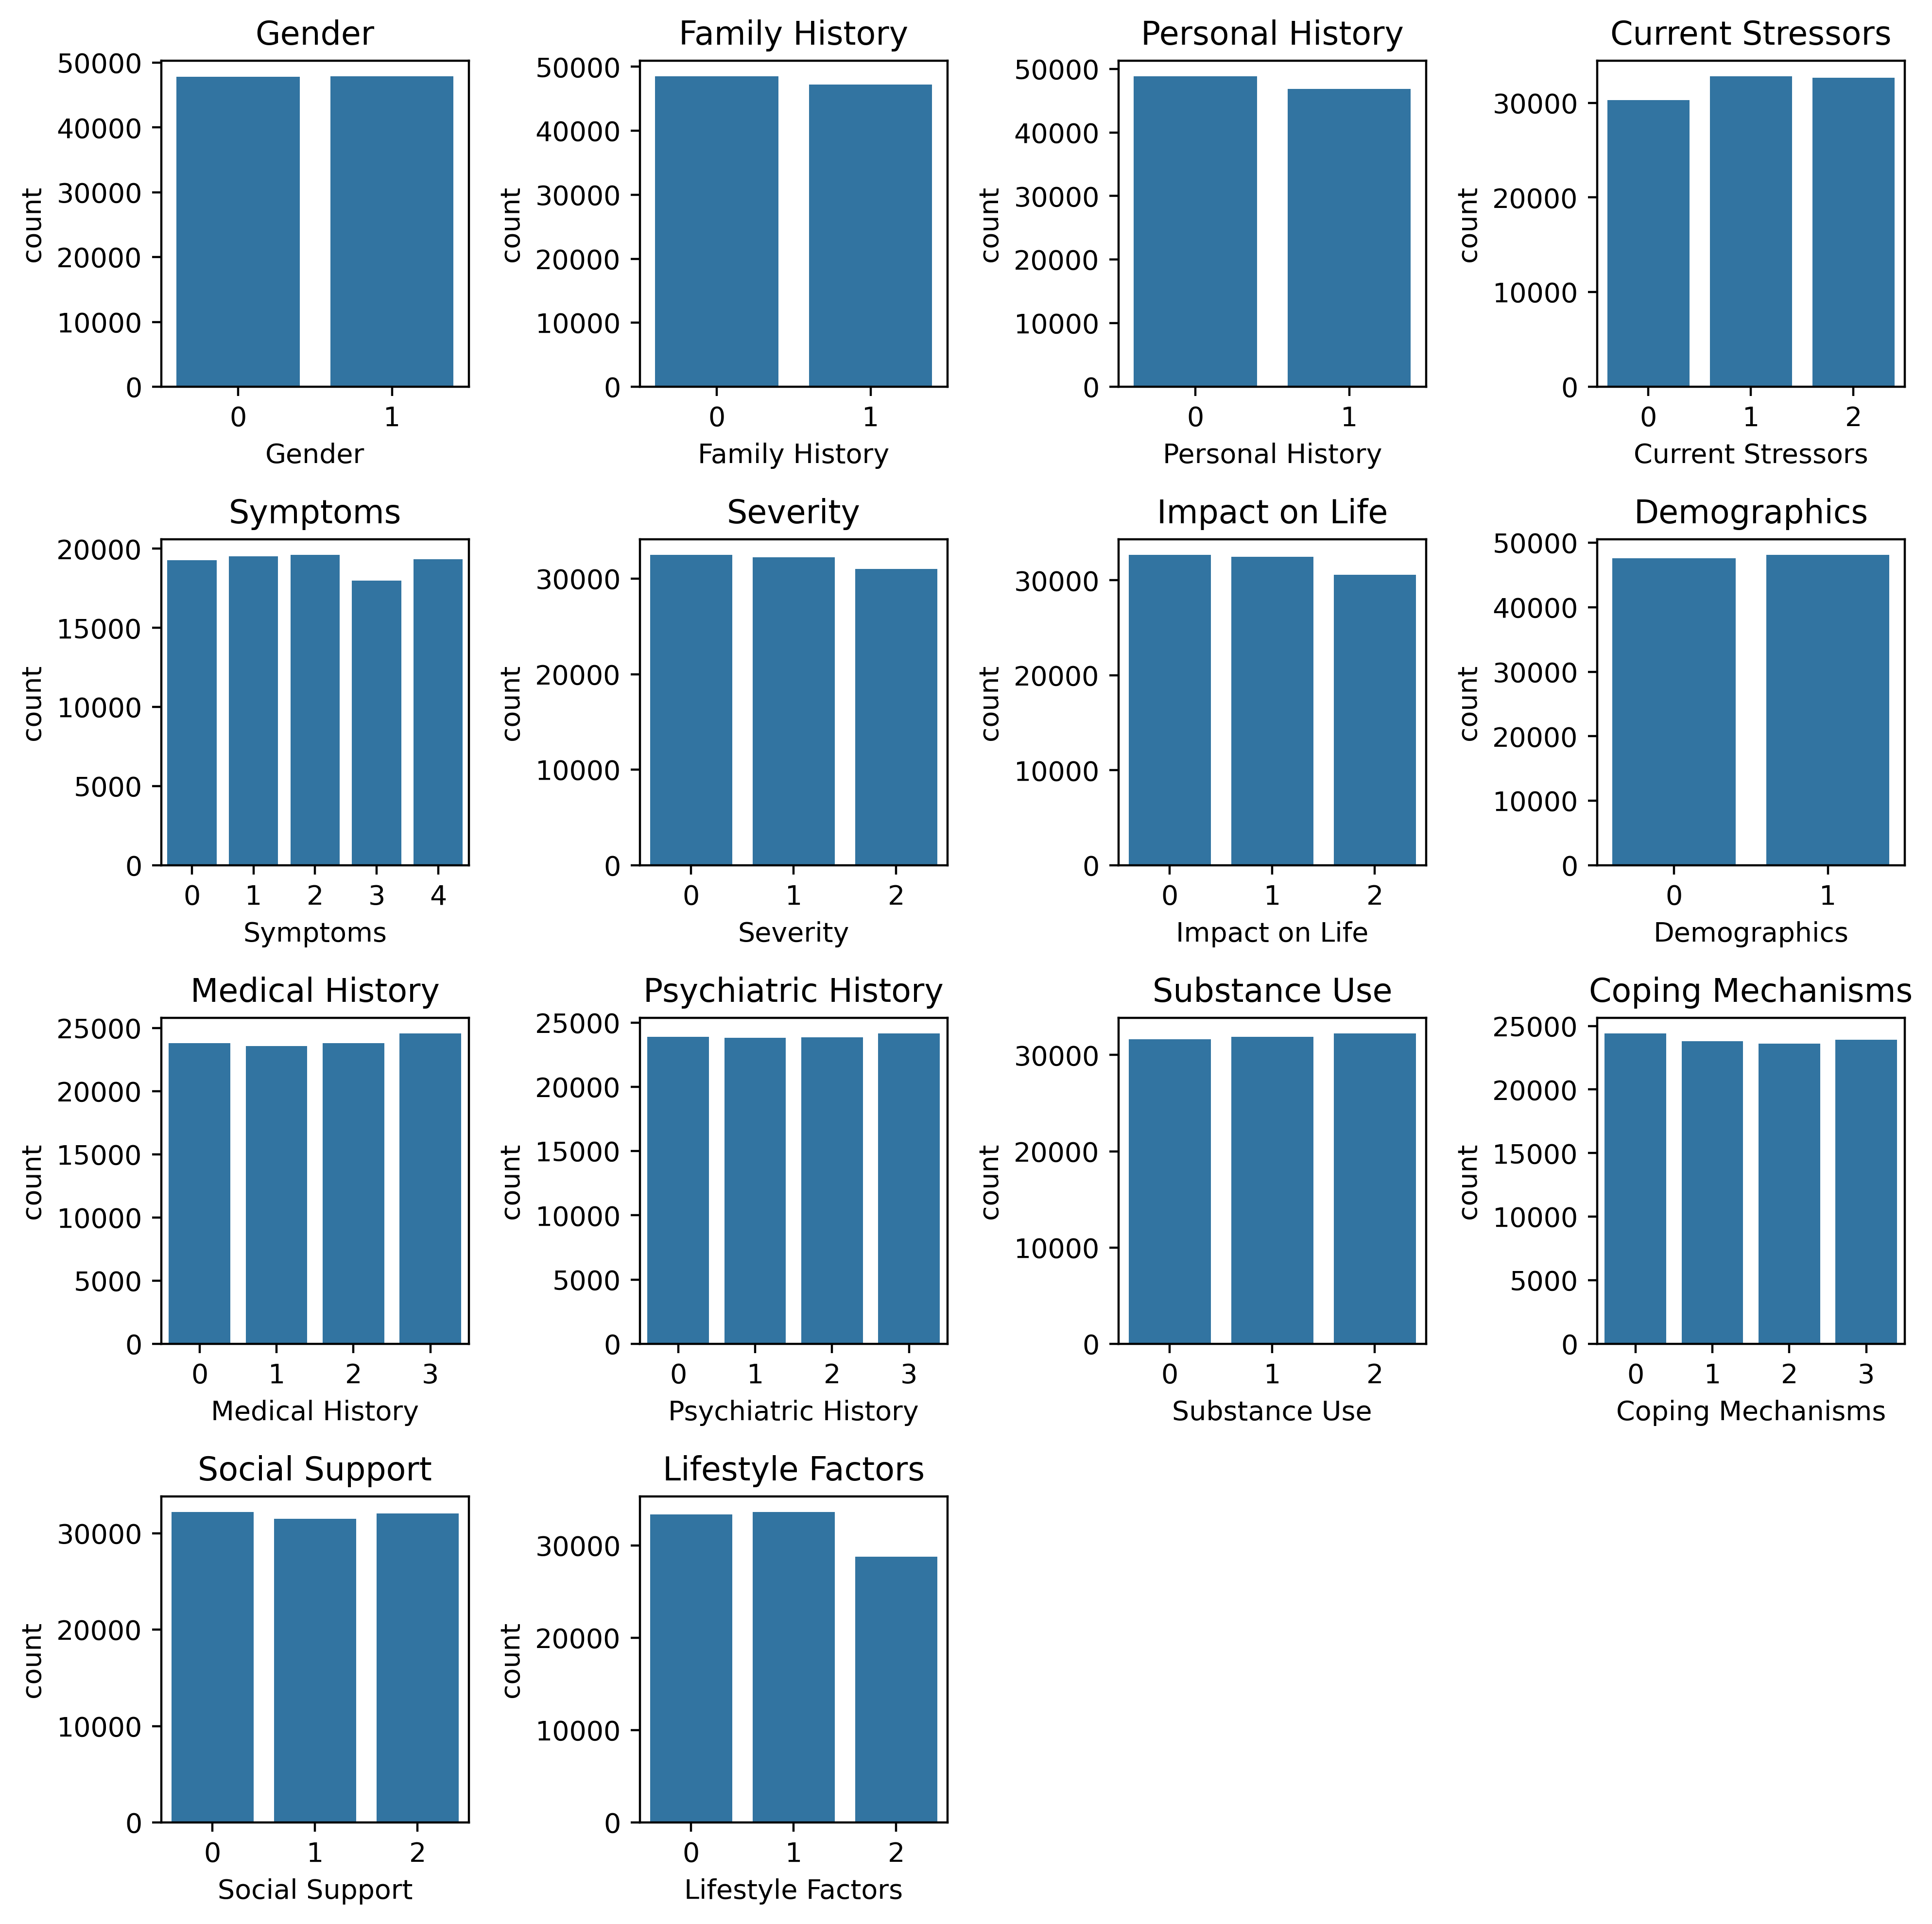

In [81]:
plt.figure(figsize=(10,10),dpi=400)
for i,col in enumerate(train.drop(labels = ['Age','Panic Disorder Diagnosis'],axis = 1).columns):
    plt.subplot(4,4,i+1)
    sns.countplot(train[train["Panic Disorder Diagnosis"]==0], x=col)
    plt.title(col)
plt.tight_layout()
plt.show()


In [82]:
train.describe()

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,23.454300,0.500520,0.500420,0.497900,0.998530,1.997580,1.001450,0.997630,0.499130,1.502650,1.49780,1.001930,1.504780,0.999000,0.99741,0.04285
std,13.839204,0.500002,0.500002,0.499998,0.816036,1.411706,0.817774,0.816499,0.500002,1.120244,1.11785,0.815814,1.118369,0.817353,0.81488,0.20252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.00000,0.00000
50%,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1.00000,1.000000,2.000000,1.000000,1.00000,0.00000
75%,35.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.00000,0.00000
max,47.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000,3.000000,3.00000,2.000000,3.000000,2.000000,2.00000,1.00000


In [83]:
train.groupby('Panic Disorder Diagnosis').agg("mean")[["Age","Current Stressors","Severity","Impact on Life","Social Support"]]

,Age,Current Stressors,Severity,Impact on Life,Social Support
Panic Disorder Diagnosis,,,,,
0,23.45577,1.024573,0.984506,0.978123,0.998402
1,23.42147,0.416803,1.379930,1.433372,1.012369


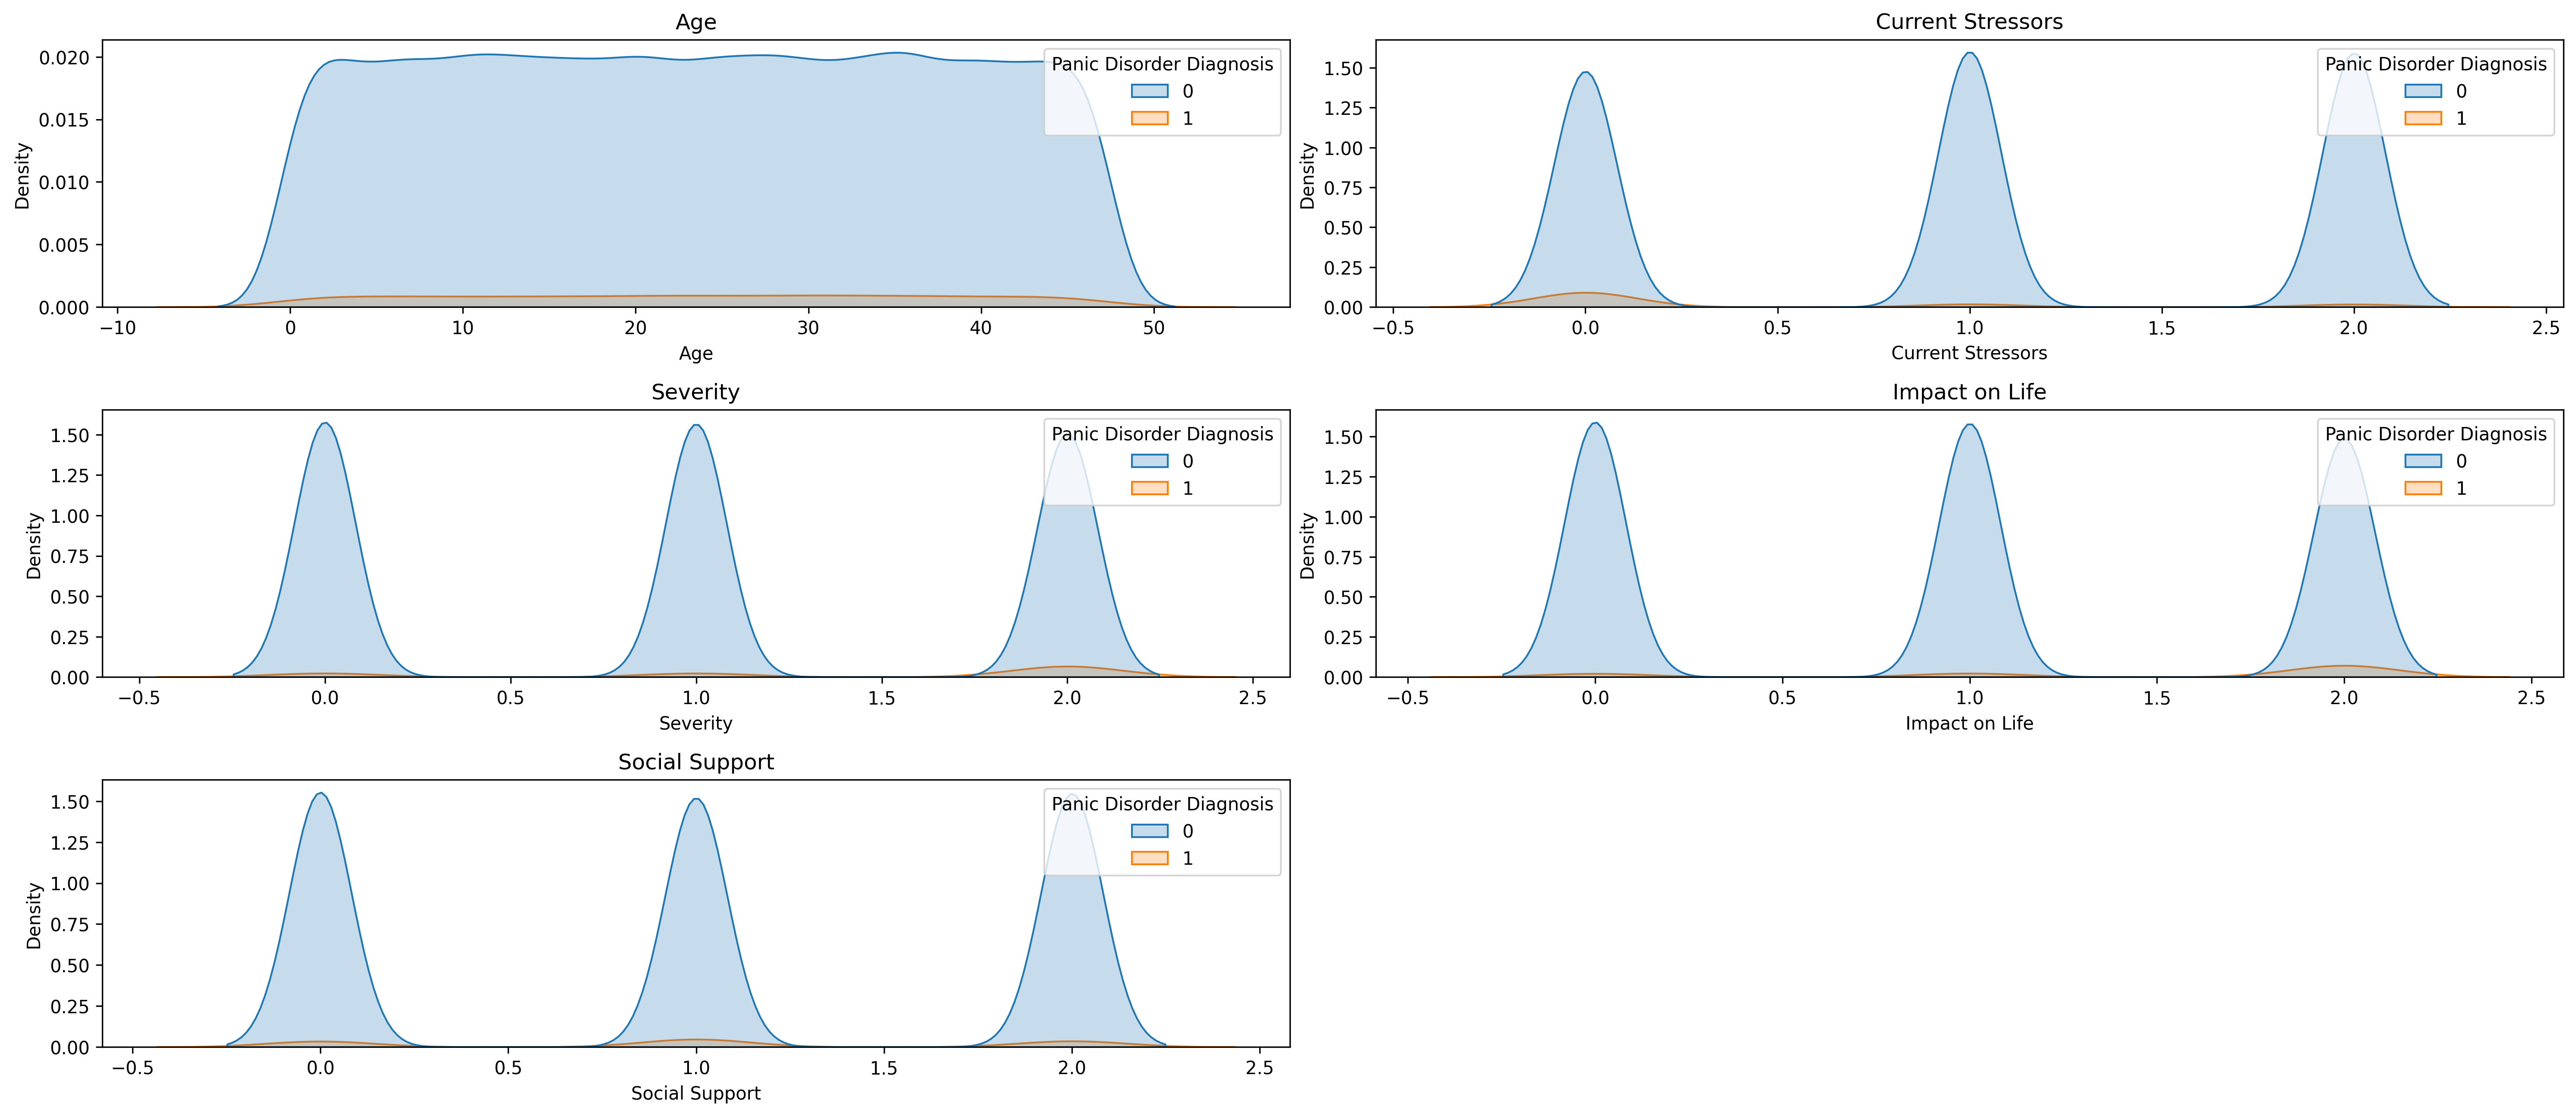

In [84]:
plt.figure(figsize=(20,14),dpi=300)
fill_list=['Age','Current Stressors','Severity','Impact on Life','Social Support']
for i,col in enumerate(fill_list):
    plt.subplot(5,2,i+1)
    sns.kdeplot(x=col, data=train, hue = "Panic Disorder Diagnosis",fill = True)
    plt.title(col)
plt.tight_layout()
plt.show()

<Figure size 6000x4200 with 0 Axes>

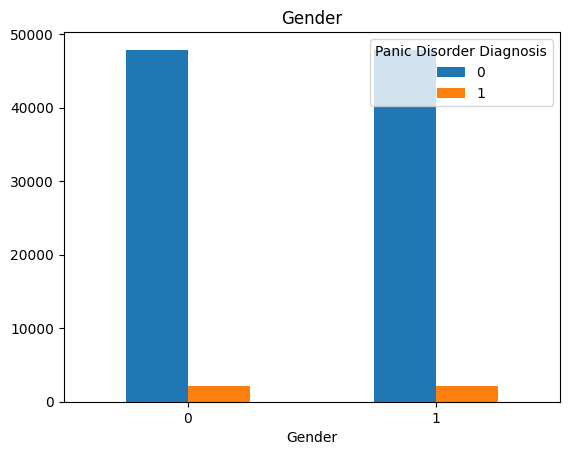

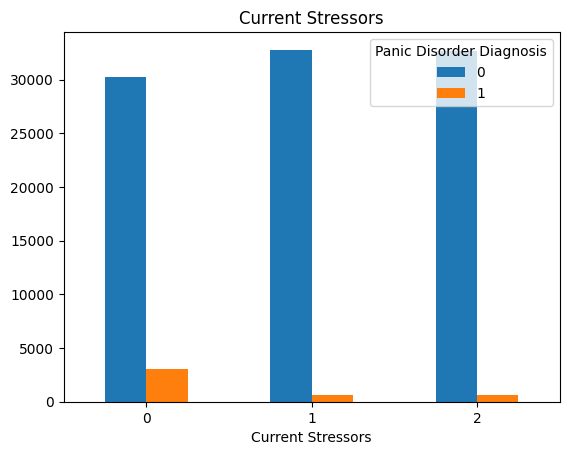

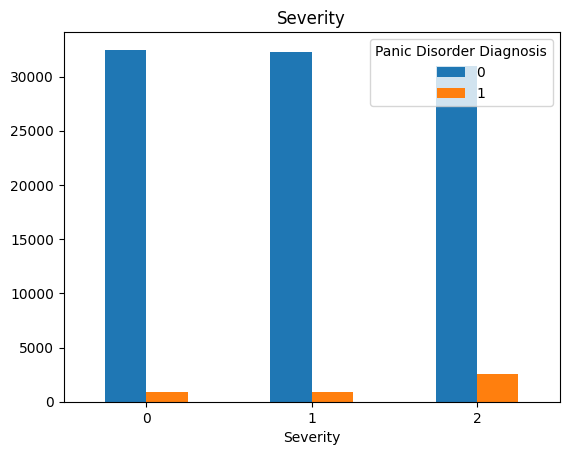

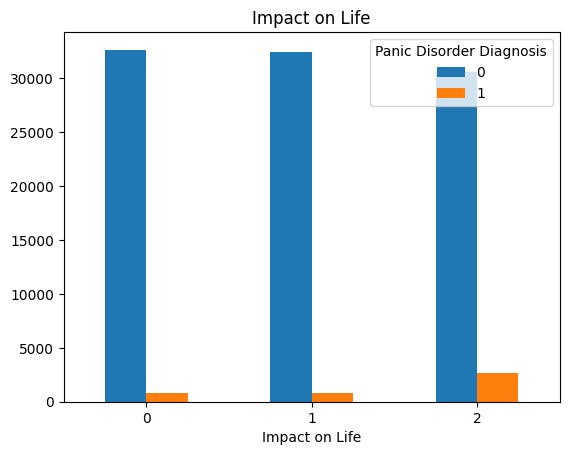

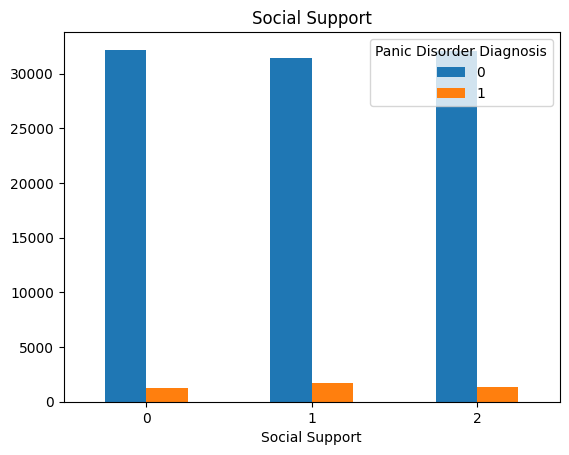

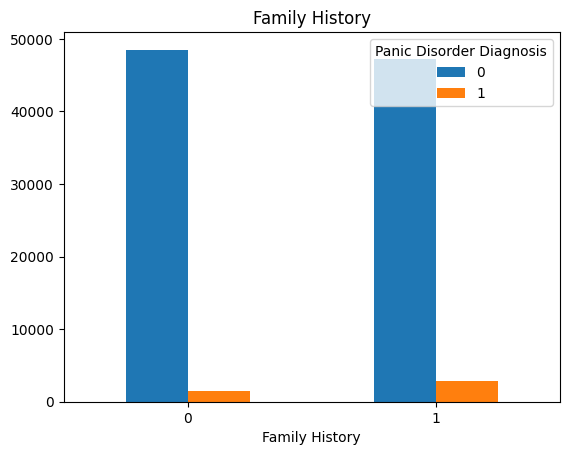

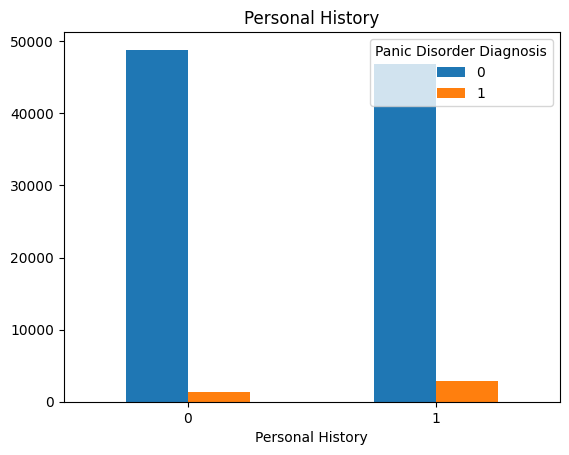

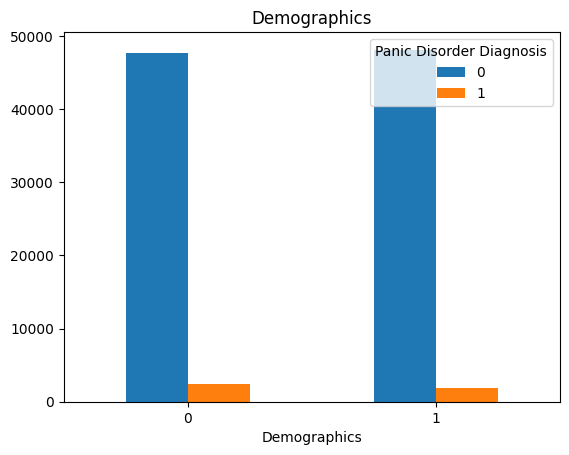

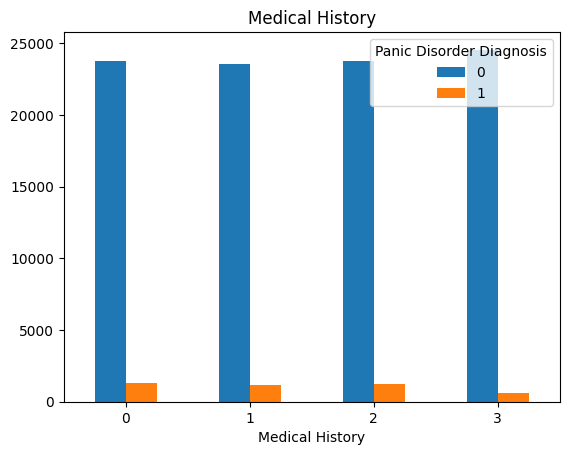

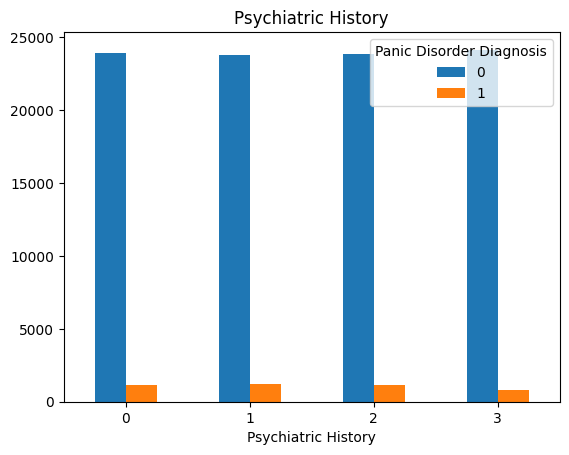

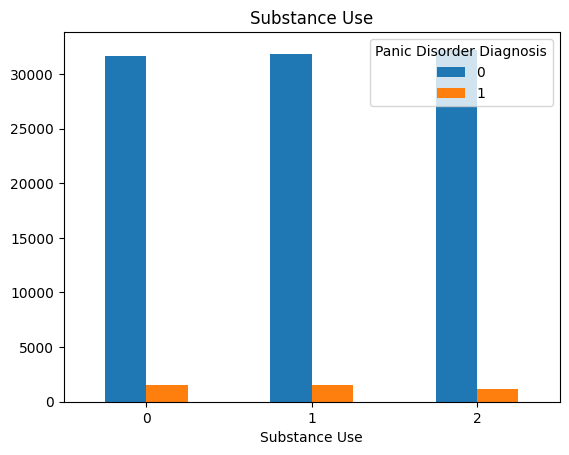

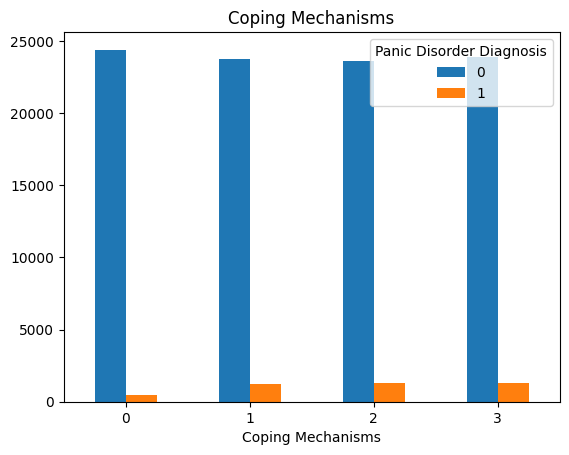

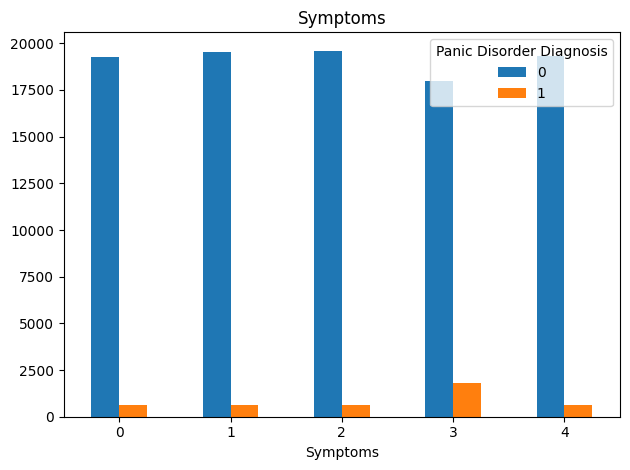

In [85]:
plt.figure(figsize=(20,14),dpi=300)
fill_list=['Gender','Current Stressors','Severity','Impact on Life','Social Support','Family History','Personal History','Demographics','Medical History','Psychiatric History','Substance Use','Coping Mechanisms','Symptoms']
for i,col in enumerate(fill_list):
  pd.crosstab(train[col],train["Panic Disorder Diagnosis"]).plot.bar(rot=0)
  plt.title(col)
plt.tight_layout()
plt.show()


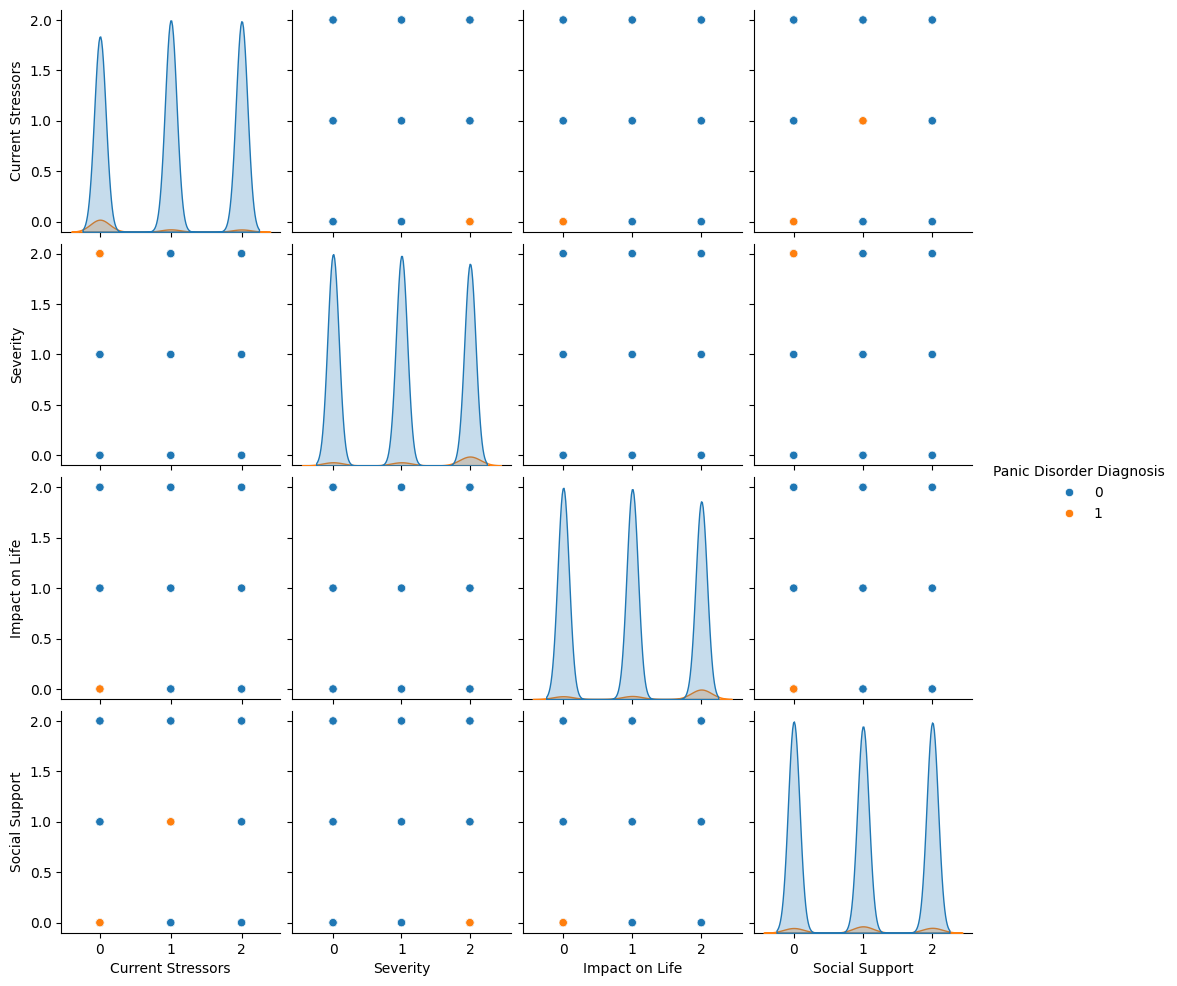

In [86]:
sns.pairplot(train, x_vars= ['Current Stressors','Severity','Impact on Life','Social Support'], y_vars=['Current Stressors','Severity','Impact on Life','Social Support'], hue = "Panic Disorder Diagnosis")

# Undersampling of data

In [228]:
# tl = TomekLinks(sampling_strategy='auto')
# train_resampled, train_resampled_pred = tl.fit_resample(df.drop(labels = ['Panic Disorder Diagnosis'],axis =1),df['Panic Disorder Diagnosis'])

# undersampler = RandomUnderSampler(sampling_strategy = 0.045, random_state=42)
# oversampler = RandomOverSampler(sampling_strategy=0.045, random_state=42)
# train_resampled, train_resampled_pred = oversampler.fit_resample(train.drop(labels = ['Panic Disorder Diagnosis'],axis =1),train['Panic Disorder Diagnosis'])
# train_resampled, train_resampled_pred = undersampler.fit_resample(train_resampled,train_resampled_pred)
# train_resampled = pd.concat([train_resampled,train_resampled_pred],axis =1)

# smt = SMOTEENN(random_state=42)
# train_resampled, train_resampled_pred = smt.fit_resample(train.drop(labels = ['Panic Disorder Diagnosis'],axis =1),train['Panic Disorder Diagnosis'])

undersampler = RandomUnderSampler(sampling_strategy = 0.10, random_state=42)
oversampler = RandomOverSampler(sampling_strategy=0.045, random_state=42)
train_resampled, train_resampled_pred = oversampler.fit_resample(train.drop(labels = ['Panic Disorder Diagnosis'],axis =1),train['Panic Disorder Diagnosis'])
train_resampled, train_resampled_pred = undersampler.fit_resample(train_resampled,train_resampled_pred)
train_resampled = pd.concat([train_resampled,train_resampled_pred],axis =1)


# train_resampled.info()
print("Train size: ", train_resampled.shape)
print("Train Lables:")
print(train_resampled['Panic Disorder Diagnosis'].value_counts())
print("Test size: ", test.shape)
print("Test Lables:")
print(test['Panic Disorder Diagnosis'].value_counts())


# train_resampled = train
# test_resampled = test

Train size:  (47377, 16)
Train Lables:
Panic Disorder Diagnosis
0    43070
1     4307
Name: count, dtype: int64
Test size:  (20000, 16)
Test Lables:
Panic Disorder Diagnosis
0    19159
1      841
Name: count, dtype: int64


# Feature Selection

In [229]:
estimator = ExtraTreesRegressor(random_state=42)

rfecv = RFECV(estimator, min_features_to_select = 1)

# Fit the data
rfecv.fit(train.drop(labels = ['Panic Disorder Diagnosis'],axis =1),train["Panic Disorder Diagnosis"])

# Get integer index of the features selected
feature_index = rfecv.get_support(indices = True)

# Get a mask of the features selected
feature_mask = rfecv.support_

# Get selected feature names
feature_names = rfecv.get_feature_names_out()

# Get the number of features retained
feature_number = rfecv.n_features_

# Get results
results = pd.DataFrame(rfecv.cv_results_)

# Get RFECV score
rfecv_score = rfecv.score(train.drop(labels = ['Panic Disorder Diagnosis'],axis =1),train["Panic Disorder Diagnosis"])

# Print feature number, names and score
print('Original feature number:', len(train.columns))
print('Optimal feature number:', feature_number)
print('Selected features:', feature_names)
print('Score:', rfecv_score)

Original feature number: 16
Optimal feature number: 13
Selected features: ['Family History' 'Personal History' 'Current Stressors' 'Symptoms'
 'Severity' 'Impact on Life' 'Demographics' 'Medical History'
 'Psychiatric History' 'Substance Use' 'Coping Mechanisms'
 'Social Support' 'Lifestyle Factors']
Score: 1.0


Top  13  feature rankings:
1. Lifestyle Factors: 0.21391859104654143
2. Current Stressors: 0.10967062816520737
3. Symptoms: 0.10720443020089886
4. Impact on Life: 0.09015171873845255
5. Severity: 0.07964551974615962
6. Age: 0.06253644540861288
7. Coping Mechanisms: 0.052168853327544534
8. Family History: 0.051122813757993435
9. Medical History: 0.04728261788255127
10. Personal History: 0.046909822930704594
11. Psychiatric History: 0.03729206253704847
12. Social Support: 0.03372846716399703
13. Substance Use: 0.029760066840816623


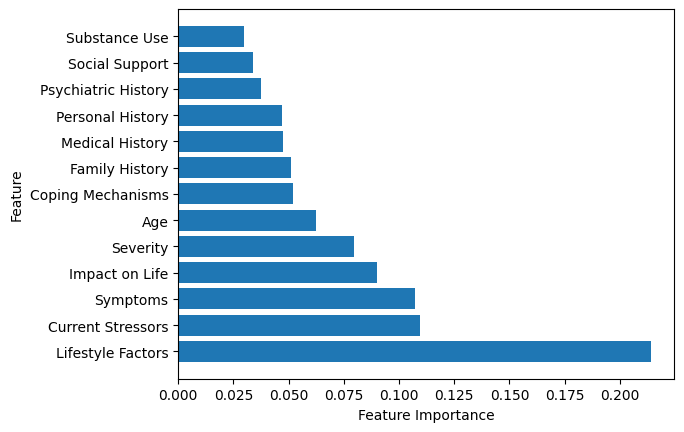

In [230]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(train.drop(labels = ['Panic Disorder Diagnosis'],axis =1),train["Panic Disorder Diagnosis"])

# Get feature importances from the trained model
importances = rfc.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]


num_features = feature_number
top_indices = indices[:num_features]
top_importances = importances[top_indices]


print("Top ",num_features," feature rankings:")
for f in range(num_features):
    print(f"{f+1}. {train.columns[indices[f]]}: {importances[indices[f]]}")
plt.barh(range(num_features), top_importances, align="center")
plt.yticks(range(num_features), train.columns[top_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

# Train - Test Split

In [231]:
#Found from up above Feature selection.
relevant_cols_resampled = ["Lifestyle Factors","Current Stressors","Impact on Life","Symptoms","Severity","Personal History","Family History","Age","Medical History","Coping Mechanisms"]
#It should be noted that relavant cols = relavent_cold_resampled but only position changes

output_train_resampled = train_resampled["Panic Disorder Diagnosis"]
train_resampled = train_resampled.loc[:,relevant_cols_resampled]

Preparing Splitting of dataset

In [232]:
# Spliting data set for Cross validation

test_size = (test.shape[0]/train_resampled.shape[0])

X_train, X_validation, Y_train, Y_validation = train_test_split(train_resampled,output_train_resampled,test_size=test_size,random_state=42)

X_test = test.loc[:,relevant_cols_resampled]
Y_test = test["Panic Disorder Diagnosis"]

In [233]:
# Checking splitied data sets

print("Training size: ", X_train.shape)
print("Validation size: ", X_validation.shape)
print("Testing size: ", X_test.shape)

Training size:  (27377, 10)
Validation size:  (20000, 10)
Testing size:  (20000, 10)


# Training and Testing  models

1.Multiple Layer Perceptron

In [234]:

MLP_model = MLPClassifier()

MLP_model.fit(X_train, Y_train)

Y_pred = MLP_model.predict(X_validation)

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))


              precision    recall  f1-score   support

           0       0.96      0.89      0.92     19159
           1       0.04      0.10      0.06       841

    accuracy                           0.86     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.92      0.86      0.89     20000

[[17053  2106]
 [  754    87]]
Classification accuracy : 0.8570
Precision : 0.8901
Recall or Sensitivity : 0.9577
True Positive Rate : 0.9577
False Positive Rate : 0.9603



2.Naive Bayes

In [235]:
nb=GaussianNB()
nb_model=nb.fit(X_train,Y_train)
Y_pred = nb_model.predict(X_validation)

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

              precision    recall  f1-score   support

           0       0.96      0.64      0.77     19159
           1       0.05      0.40      0.08       841

    accuracy                           0.63     20000
   macro avg       0.50      0.52      0.43     20000
weighted avg       0.92      0.63      0.74     20000

[[12268  6891]
 [  506   335]]
Classification accuracy : 0.6301
Precision : 0.6403
Recall or Sensitivity : 0.9604
True Positive Rate : 0.9604
False Positive Rate : 0.9536



3.GradientBoosting

In [236]:
GBC_model = GradientBoostingClassifier()

GBC_model.fit(X_train, Y_train)

Y_pred = GBC_model.predict(X_validation)

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))


              precision    recall  f1-score   support

           0       0.96      0.90      0.93     19159
           1       0.04      0.10      0.06       841

    accuracy                           0.87     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.92      0.87      0.89     20000

[[17226  1933]
 [  756    85]]
Classification accuracy : 0.8656
Precision : 0.8991
Recall or Sensitivity : 0.9580
True Positive Rate : 0.9580
False Positive Rate : 0.9579



4.ExtraTrees

In [237]:
ETC_model = ExtraTreesClassifier()

ETC_model.fit(X_train, Y_train)

Y_pred = ETC_model.predict(X_validation)

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))


              precision    recall  f1-score   support

           0       0.96      0.90      0.93     19159
           1       0.04      0.09      0.05       841

    accuracy                           0.87     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.92      0.87      0.89     20000

[[17326  1833]
 [  766    75]]
Classification accuracy : 0.8700
Precision : 0.9043
Recall or Sensitivity : 0.9577
True Positive Rate : 0.9577
False Positive Rate : 0.9607



5.AdaBoost

In [ ]:
ABC_model = AdaBoostClassifier()

ABC_model.fit(X_train, Y_train)

ABC_Y_pred = ABC_model.predict(X_validation)

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     19159
           1       0.04      0.09      0.05       841

    accuracy                           0.87     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.92      0.87      0.89     20000

[[17347  1812]
 [  766    75]]
Classification accuracy : 0.8711
Precision : 0.9054
Recall or Sensitivity : 0.9577
True Positive Rate : 0.9577
False Positive Rate : 0.9603


6. KNN(with hyper-paraterisation)

In [238]:
knn_params={'n_neighbors':([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(cv=5,estimator=KNeighborsClassifier(),param_grid=knn_params)
knn_cv.fit(X_train,Y_train)
# cv stands for cross-validatory Classification
print("Best score:"+str(knn_cv.best_score_))
print("Best parameters: "+str(knn_cv.best_params_))

Best score:0.9389632668581207
Best parameters: {'n_neighbors': 5}


In [239]:
knn=KNeighborsClassifier(5)
knn_tuned= knn.fit(X_train,Y_train)

Y_pred=knn_tuned.predict(X_validation)


print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))


#scores = cross_val_score(knn_tuned, X_train, Y_train, cv = 10, scoring='accuracy')
# print('Cross-validation scores:{}'.format(scores))
# print('Average cross-validation score: {:.4f}'.format(scores.mean()))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     19159
           1       0.04      0.07      0.05       841

    accuracy                           0.90     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.92      0.90      0.91     20000

[[17846  1313]
 [  785    56]]
Classification accuracy : 0.8951
Precision : 0.9315
Recall or Sensitivity : 0.9579
True Positive Rate : 0.9579
False Positive Rate : 0.9591


7. SVM(Linear) (will require Hyper-parameterization)


In [240]:
svc_params={"C":np.arange(1,8)}
svc=SVC(kernel="linear",class_weight='balanced', probability=True)
svc_cv_model=GridSearchCV(svc,svc_params,cv=3,n_jobs=1,verbose=2)
svc_cv_model.fit(X_train,Y_train)
print("Best Parameter: "+str(svc_cv_model.best_params_))

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END ................................................C=1; total time=  59.6s
[CV] END ................................................C=1; total time=  58.7s
[CV] END ................................................C=1; total time=  58.1s
[CV] END ................................................C=2; total time= 1.3min
[CV] END ................................................C=2; total time= 1.3min
[CV] END ................................................C=2; total time= 1.3min
[CV] END ................................................C=3; total time= 1.6min
[CV] END ................................................C=3; total time= 1.7min
[CV] END ................................................C=3; total time= 1.6min
[CV] END ................................................C=4; total time= 1.9min
[CV] END ................................................C=4; total time= 1.9min
[CV] END ........................................

In [244]:



svc=SVC(kernel="linear",C=6)
svc_cv_model=svc.fit(X_train,Y_train)
svc_cv_model.fit(X_train,Y_train)
y_pred=svc_cv_model.predict(X_validation)

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))


cm = confusion_matrix(Y_test, Y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))


#scores = cross_val_score(svc_cv_model, X_train, Y_train, cv = 10, scoring='accuracy')
# print('Cross-validation scores:{}'.format(scores))
# print('Average cross-validation score: {:.4f}'.format(scores.mean()))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     19159
           1       0.04      0.09      0.06       841

    accuracy                           0.87     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.92      0.87      0.89     20000

[[17319  1840]
 [  762    79]]
Classification accuracy : 0.8699
Precision : 0.9040
Recall or Sensitivity : 0.9579
True Positive Rate : 0.9579
False Positive Rate : 0.9588


8. Random Forest (Includes Heavy hypetuning)

In [241]:
rf_params ={"max_depth": [10,20,30,40,50],
            "min_samples_split":[2,5,7,9,11],
            "max_features":["sqrt","log2"],
            "n_estimators":[100,200, 400, 600],
            "min_samples_split":[2,5,7,9],
            'bootstrap': [True]}
rf_model=RandomForestClassifier()
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=3,n_jobs=-1,verbose=2)
rf_cv_model.fit(X_train,Y_train)
print("Best Parameter:"+str(rf_cv_model.best_params_))

Fitting 3 folds for each of 160 candidates, totalling 480 fits
Best Parameter:{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 9, 'n_estimators': 100}


In [245]:

rf_tuned=RandomForestClassifier(max_depth=10,
                                min_samples_split=9,
                                max_features='sqrt',
                                n_estimators=100,
                                bootstrap = True,
                                )
rf_tuned.fit(X_train,Y_train)
Y_pred=rf_tuned.predict(X_validation)



print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
#scores = cross_val_score(rf_tuned, X_train, Y_train, cv = 10, scoring='accuracy')
# print('Cross-validation scores:{}'.format(scores))
# print('Average cross-validation score: {:.4f}'.format(scores.mean()))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     19159
           1       0.04      0.10      0.06       841

    accuracy                           0.87     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.92      0.87      0.89     20000

[[17302  1857]
 [  759    82]]
Classification accuracy : 0.8692
Precision : 0.9031
Recall or Sensitivity : 0.9580
True Positive Rate : 0.9580
False Positive Rate : 0.9577


# Evaluating model
Comparing accuracy of Top 5 models

In [ ]:
models=[MLP_model,nb_model,GBC_model,ETC_model,ABC_model,knn_tuned,svc_cv_model,rf_tuned]
names=["MLP","GaussianNB","GBC","Extra Trees","AdaBoost","KNN","SVM","RandomForestClassifier"]
i=0
acc = np.arange(len(models))
recall = np.arange(len(models))
f1 = np.arange(len(models))
for model in models:
    name=names[i]
    Y_pred=model.predict(X_validation)
    acc[i]=accuracy_score(Y_test,Y_pred)
    recall[i]=recall_score(Y_validation,Y_pred)
    f1[i]=f1_score(Y_validation,Y_pred)
    print("-"*28)
    print(name+":")
    print("Accuracy: {:.4%}".format(acc[i]))
    i=i+1

In [ ]:
results=pd.DataFrame(columns=["Models","Accuracy"])
i=0
for model in models:
    name=names[i]
    conclusion=pd.DataFrame([[name,acc[i]*100]],columns=["Models","Accuracy"])
    results=results.append(conclusion)
    i=i+1
sns.barplot(x='Accuracy',y='Models',data=results,color="g")
plt.xlabel('Accuracy%')
plt.title('Models Accuracy Rates')

Comparing recall scores of Top 5 models


In [ ]:
# plt.figure(figsize=(10, 5))
# ax = sns.barplot(x=recall_scores, y=models, palette='Paired')

# for i, value in enumerate(recall_scores):
#     ax.text(value, i, f'{value:.3f}', ha='left', va='center')

# #plt.xlim(0.99, 1)
# plt.title('Recall score of Top 5 models', fontsize=17)
# plt.gca().invert_yaxis()
# plt.show()


results=pd.DataFrame(columns=["Models","Recall"])
i=0
for model in models:
    name=names[i]
    conclusion=pd.DataFrame([[name,recall[i]*100]],columns=["Models","Recall"])
    results=results.append(conclusion)
    i=i+1
sns.barplot(x='Recall',y='Models',data=results,color="o")
plt.xlabel('Recall%')
plt.title('Models Recall Values')

Comparing f1 score of Top 5 models

In [ ]:
results=pd.DataFrame(columns=["Models","F1 Scores"])
i=0
for model in models:
    name=names[i]
    conclusion=pd.DataFrame([[name,fi[i]*100]],columns=["Models","Recall"])
    results=results.append(conclusion)
    i=i+1
sns.barplot(x='F1 Score',y='Models',data=results,color="b")
plt.xlabel('F1 Score%')
plt.title('Models F1 Score Values')

# Saving the best model

In [246]:
pickle.dump(knn_tuned, open('model.pkl','wb'))